In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [64]:
df=pd.read_csv('/Users/d1zzy/Desktop/covid_19_data.csv')

In [68]:
df.dtypes

Date         datetime64[ns]
State                object
Country              object
Confirmed           float64
Deaths              float64
Recovered           float64
dtype: object

In [66]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [83]:
df['Date']=pd.to_datetime(df['Date'])
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [84]:
print(df2.head(50))

         Date           State         Country Confirmed Deaths Recovered
0  2020-01-22           Anhui  Mainland China       1.0    0.0       0.0
1  2020-01-22         Beijing  Mainland China      14.0    0.0       0.0
2  2020-01-22       Chongqing  Mainland China       6.0    0.0       0.0
3  2020-01-22          Fujian  Mainland China       1.0    0.0       0.0
4  2020-01-22           Gansu  Mainland China       0.0    0.0       0.0
5  2020-01-22       Guangdong  Mainland China      26.0    0.0       0.0
6  2020-01-22         Guangxi  Mainland China       2.0    0.0       0.0
7  2020-01-22         Guizhou  Mainland China       1.0    0.0       0.0
8  2020-01-22          Hainan  Mainland China       4.0    0.0       0.0
9  2020-01-22           Hebei  Mainland China       1.0    0.0       0.0
10 2020-01-22    Heilongjiang  Mainland China       0.0    0.0       0.0
11 2020-01-22           Henan  Mainland China       5.0    0.0       0.0
12 2020-01-22       Hong Kong       Hong Kong      

In [111]:
df3 = df2.groupby(['Country','Date','Confirmed','Deaths','Recovered'])[['Country','Date','Confirmed','Deaths','Recovered']].sum(numeric_only=True).reset_index()

In [113]:
print(df3.head(50))

            Country       Date  Confirmed  Deaths  Recovered
0        Azerbaijan 2020-02-28        1.0     0.0        0.0
1   ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2       Afghanistan 2020-02-24        1.0     0.0        0.0
3       Afghanistan 2020-02-25        1.0     0.0        0.0
4       Afghanistan 2020-02-26        1.0     0.0        0.0
5       Afghanistan 2020-02-27        1.0     0.0        0.0
6       Afghanistan 2020-02-28        1.0     0.0        0.0
7       Afghanistan 2020-02-29        1.0     0.0        0.0
8       Afghanistan 2020-03-01        1.0     0.0        0.0
9       Afghanistan 2020-03-02        1.0     0.0        0.0
10      Afghanistan 2020-03-03        2.0     0.0        0.0
11      Afghanistan 2020-03-04        4.0     0.0        0.0
12      Afghanistan 2020-03-05        4.0     0.0        0.0
13      Afghanistan 2020-03-06        4.0     0.0        0.0
14      Afghanistan 2020-03-07        4.0     0.0        0.0
15      Afghanistan 2020

In [114]:
countries = df3['Country'].unique()
len(countries)

226

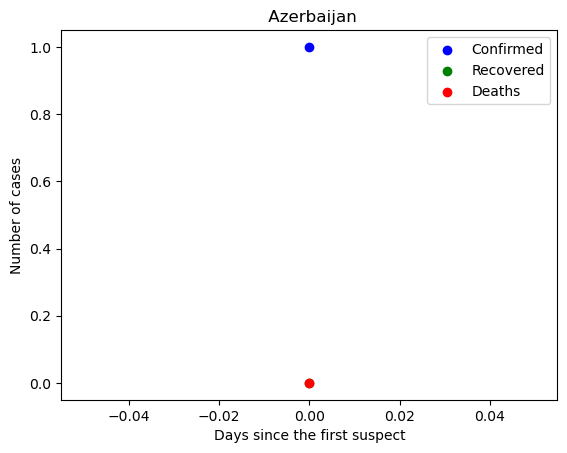

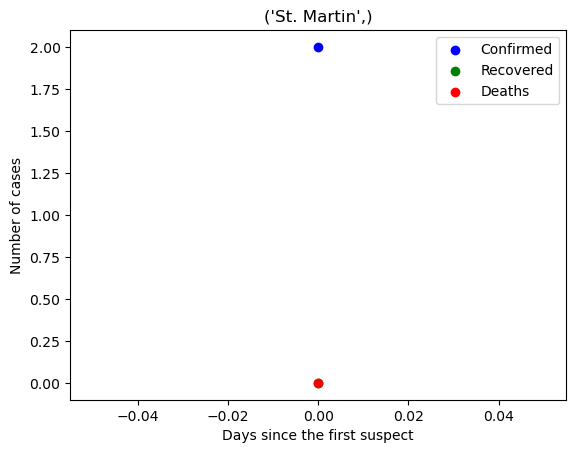

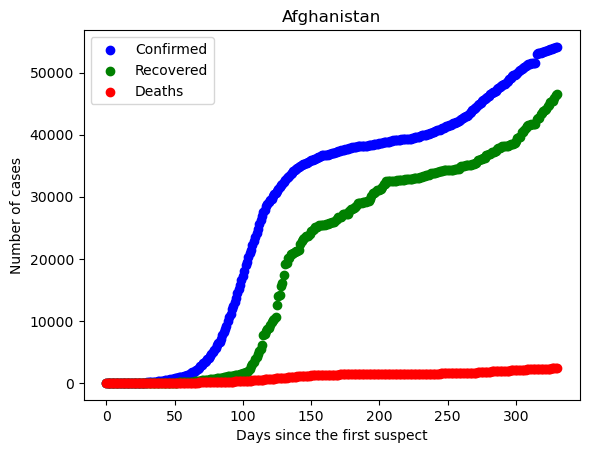

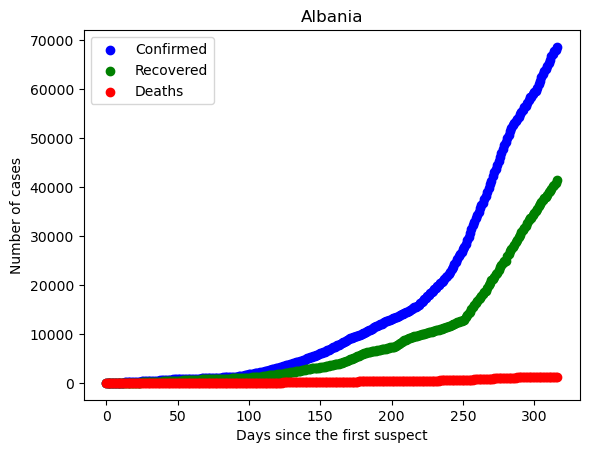

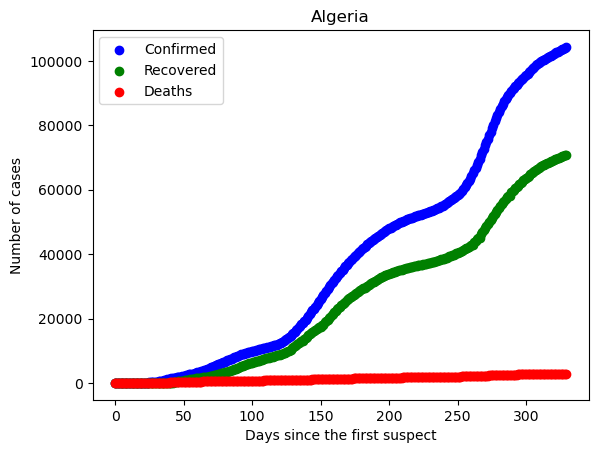

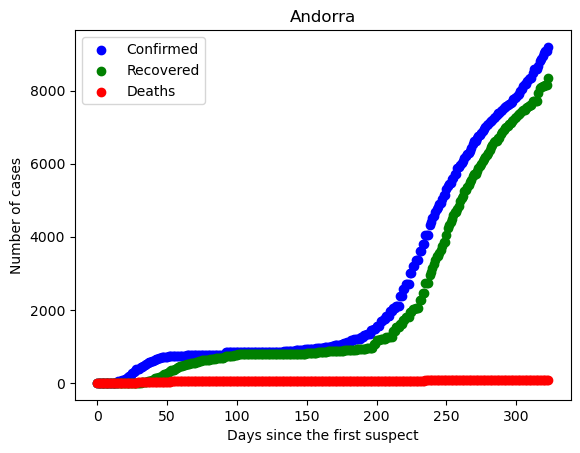

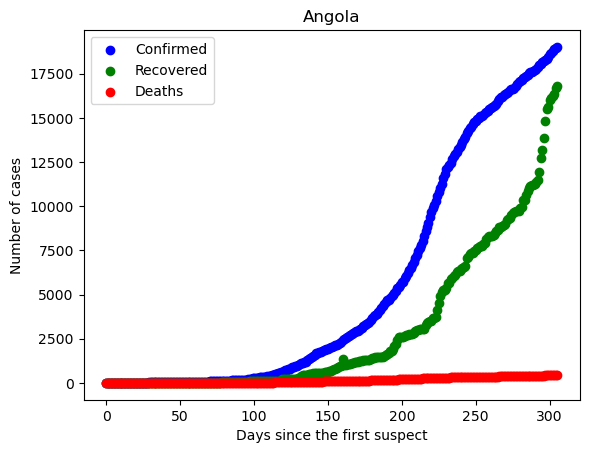

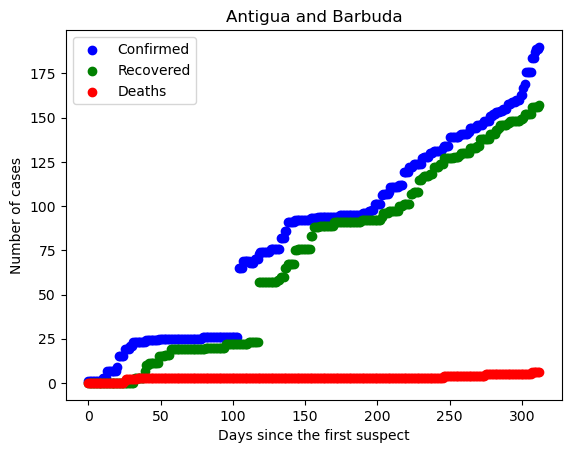

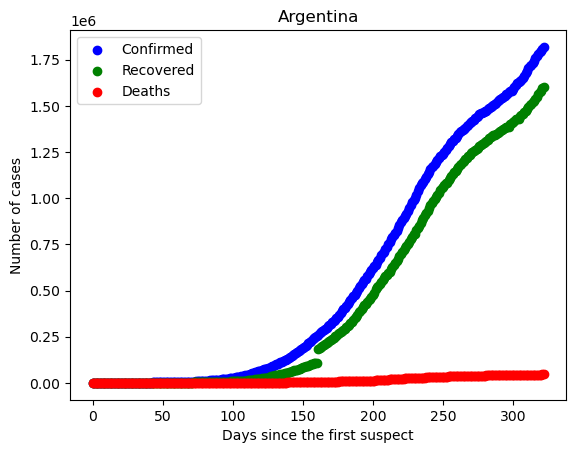

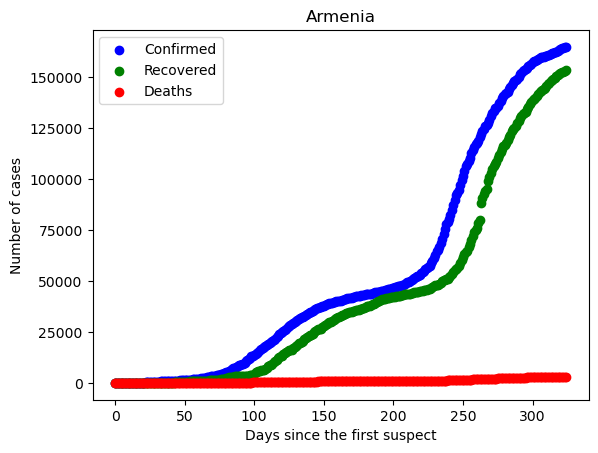

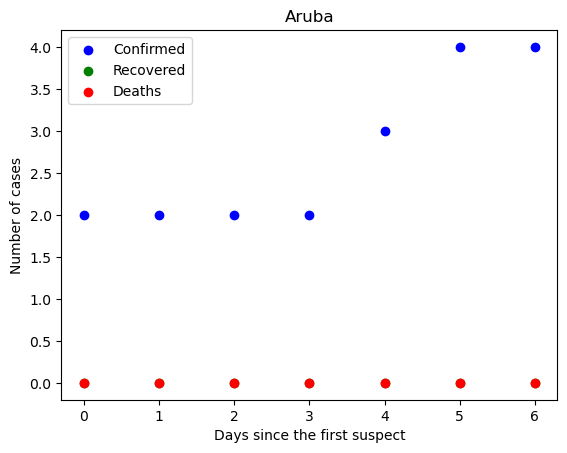

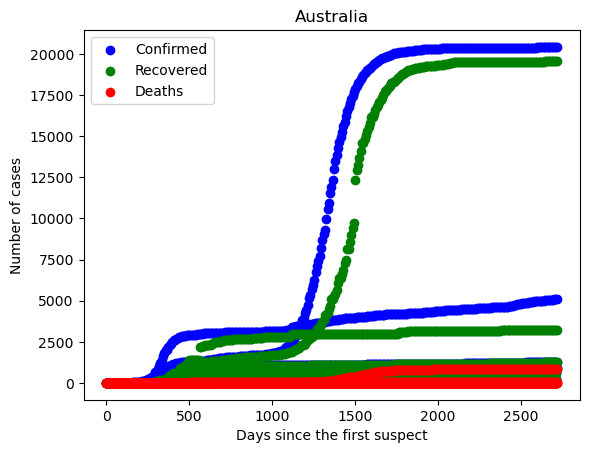

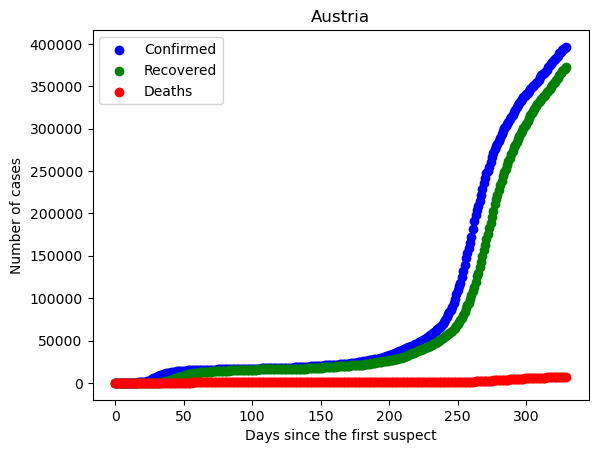

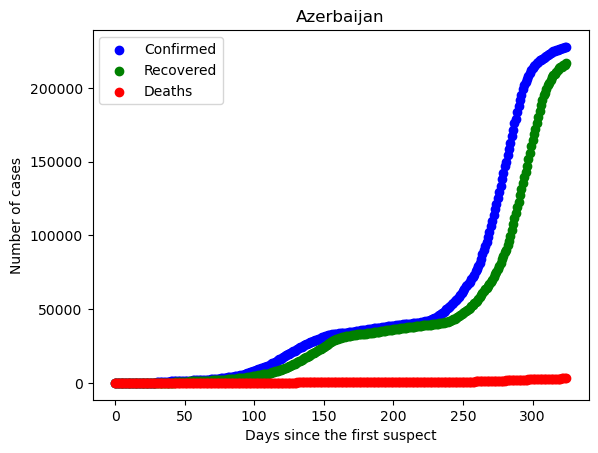

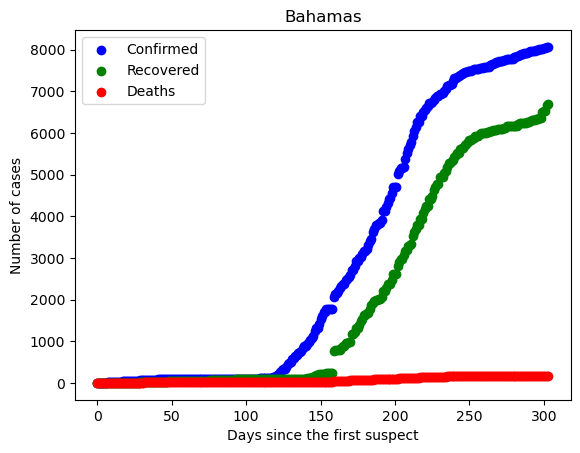

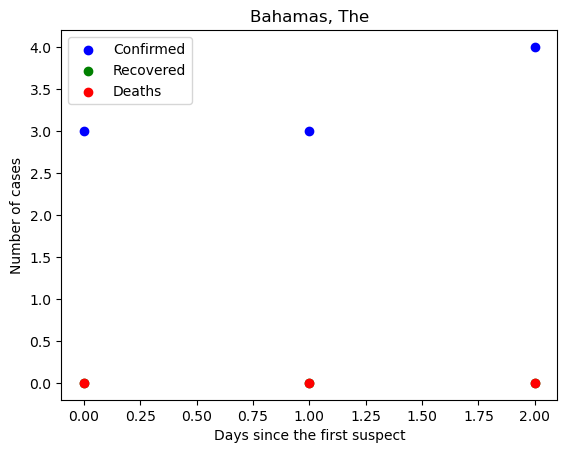

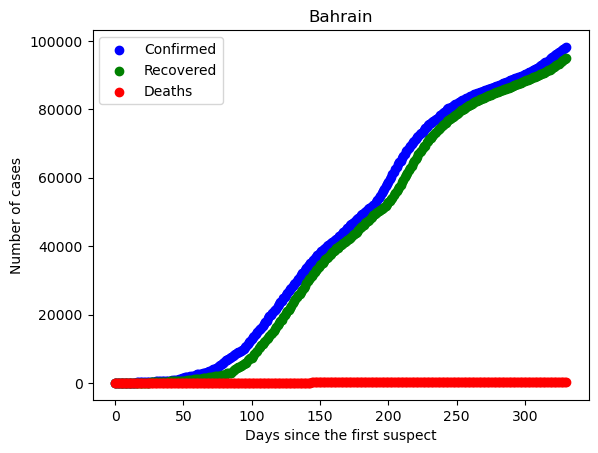

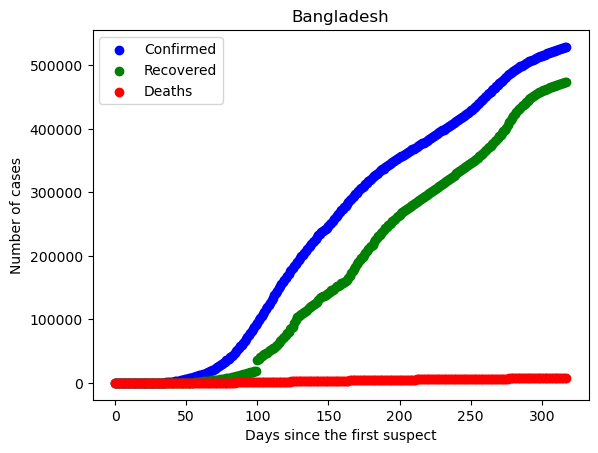

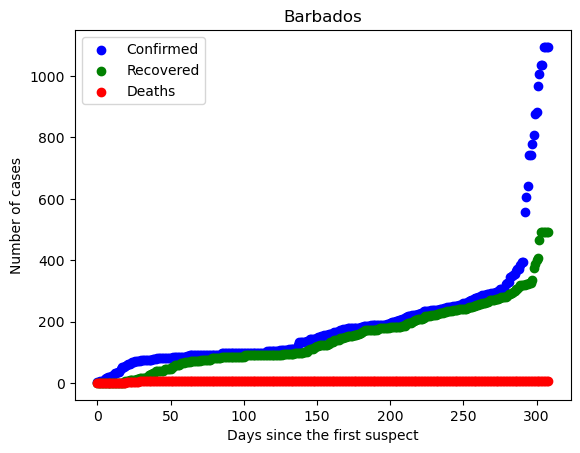

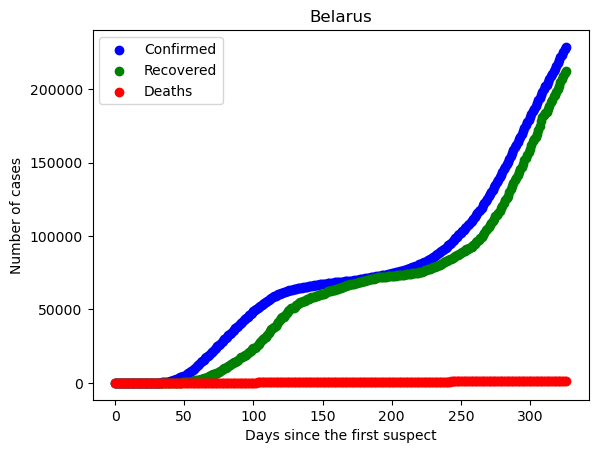

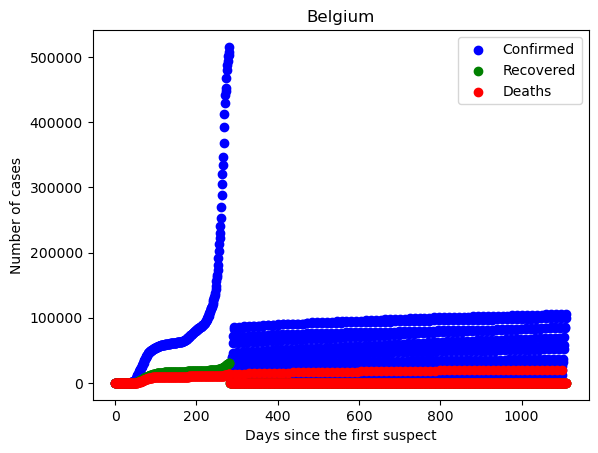

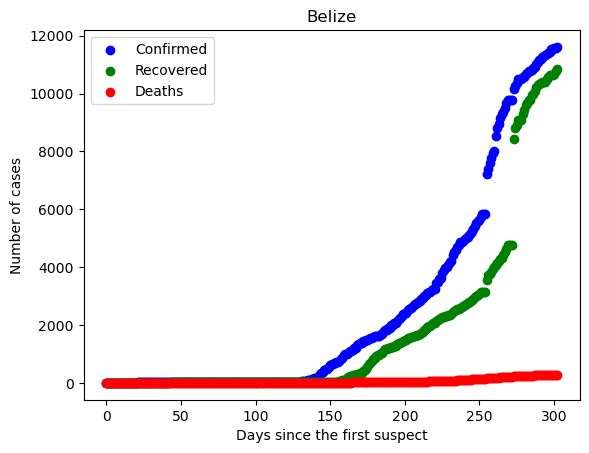

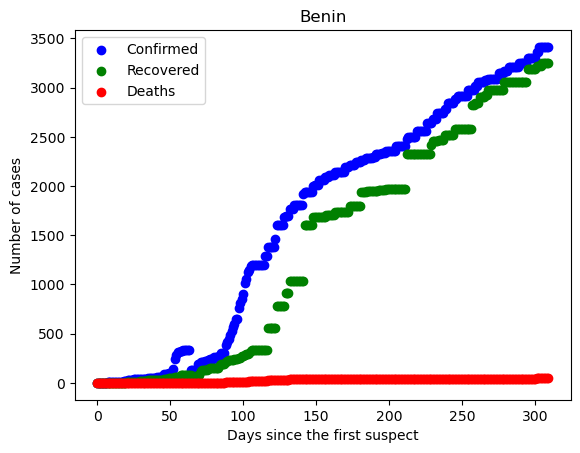

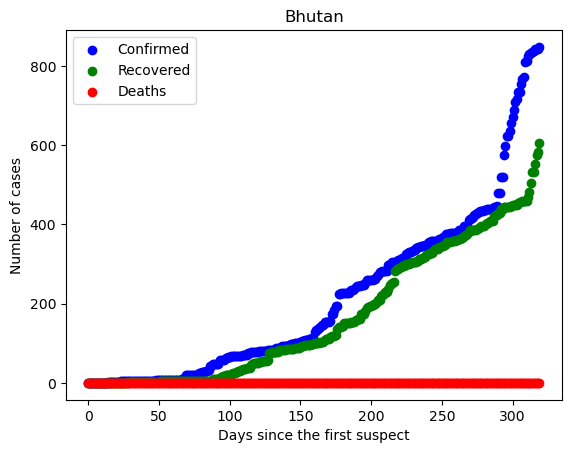

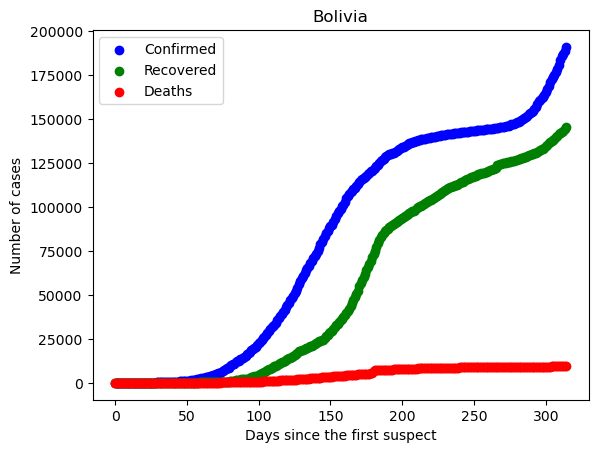

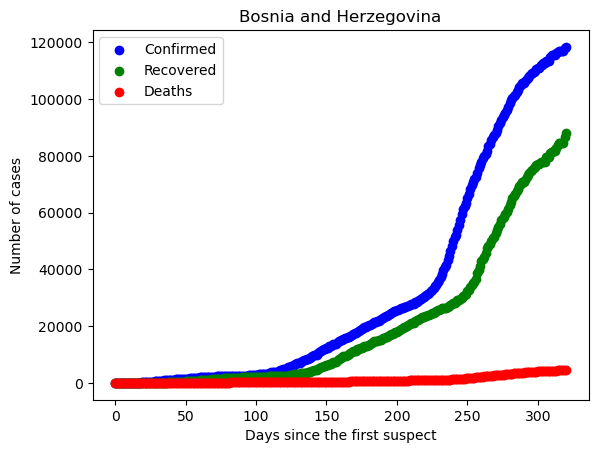

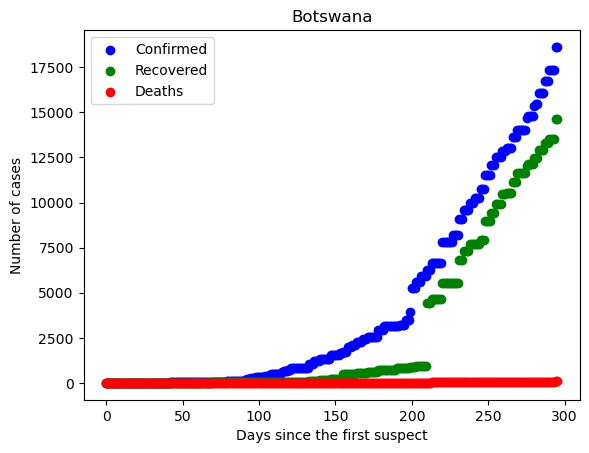

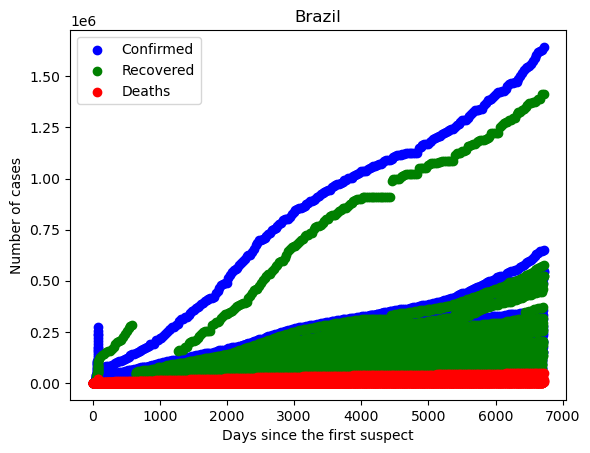

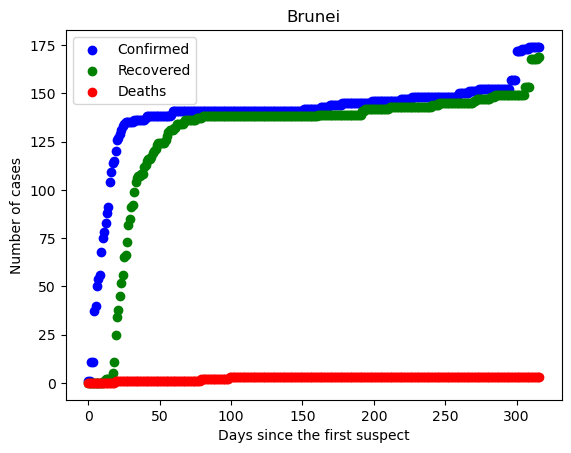

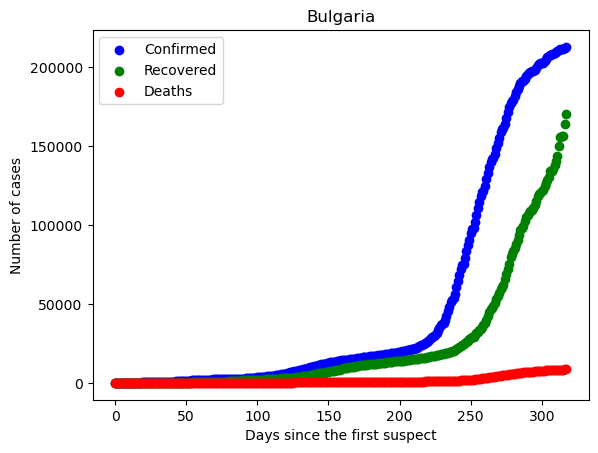

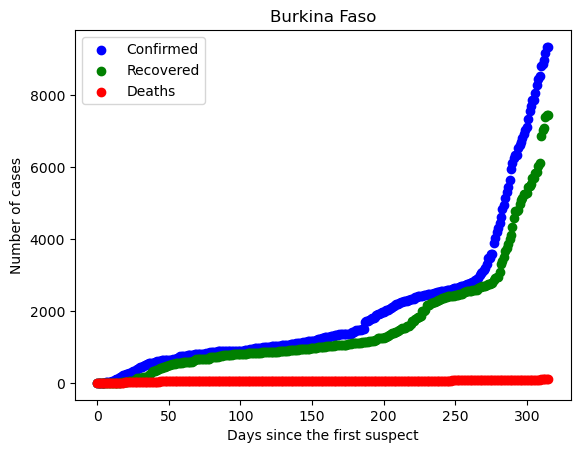

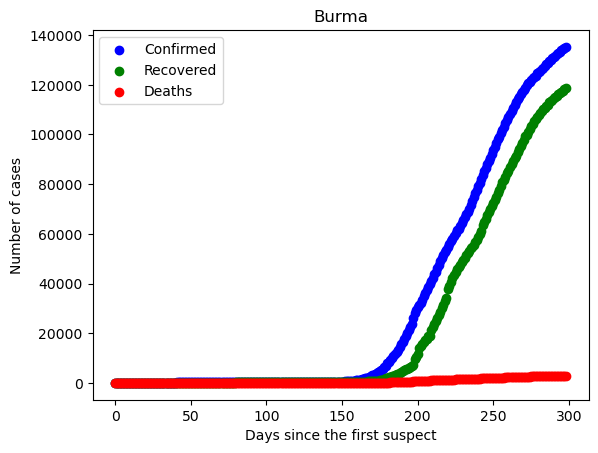

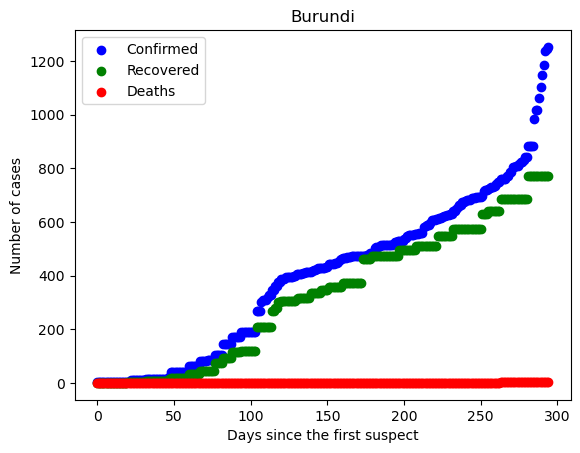

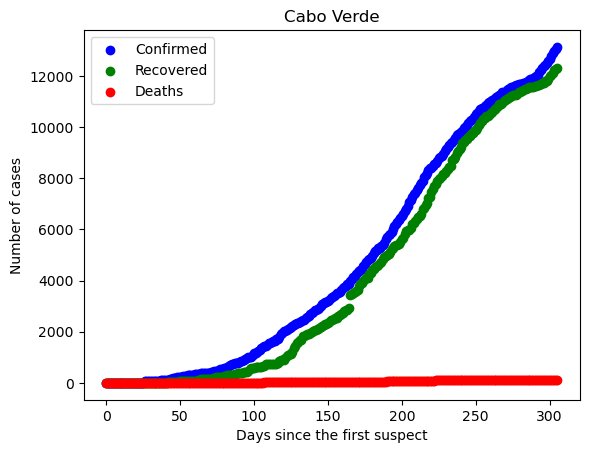

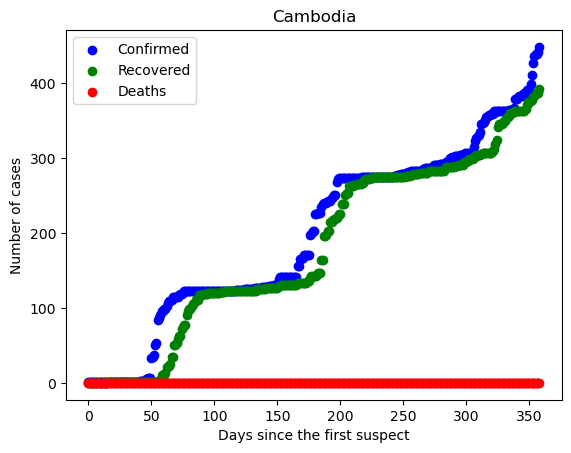

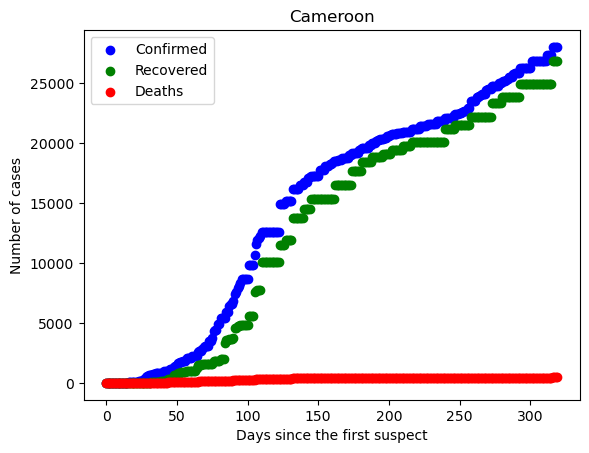

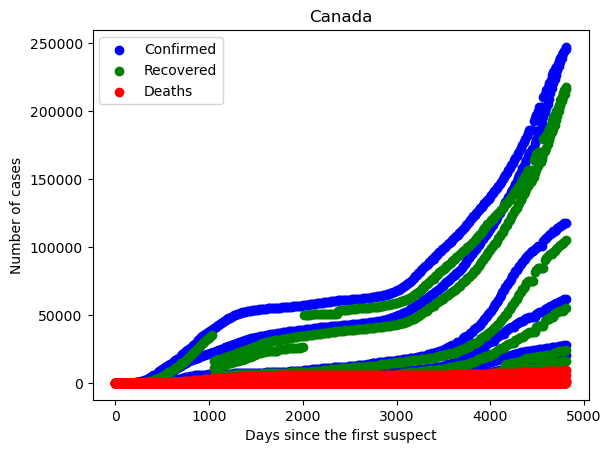

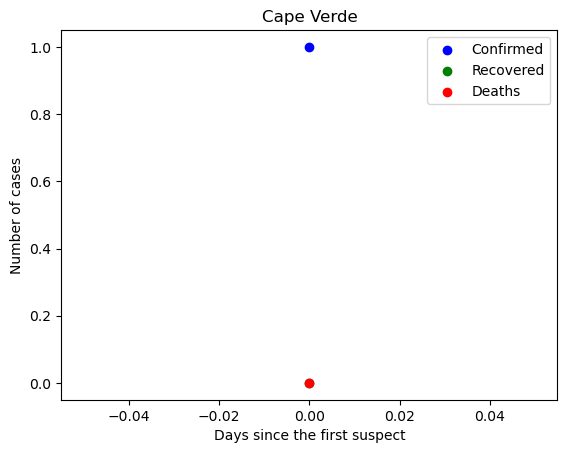

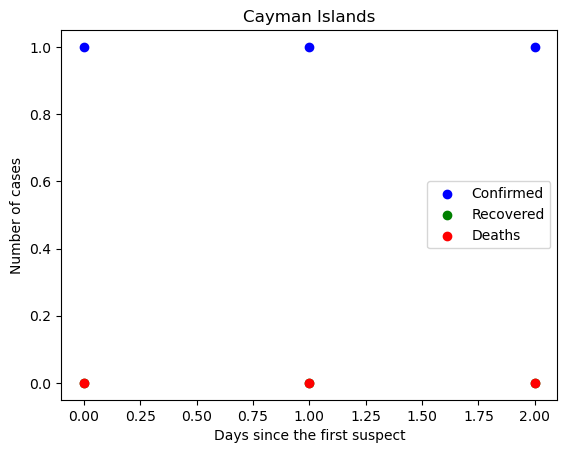

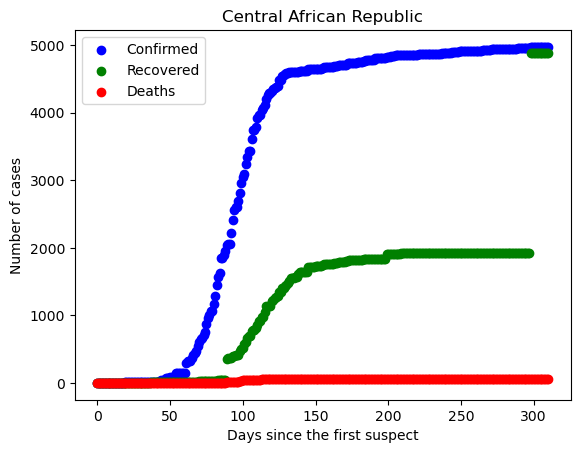

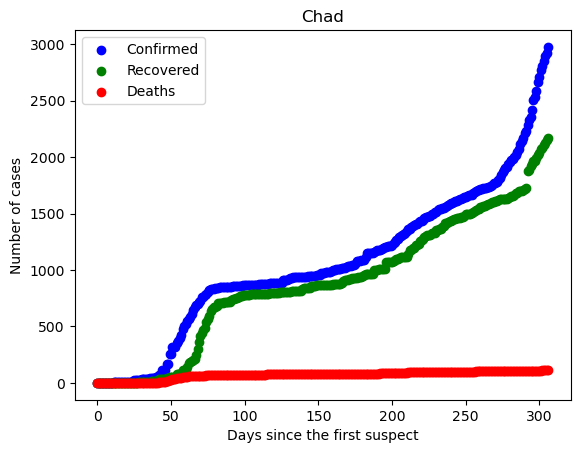

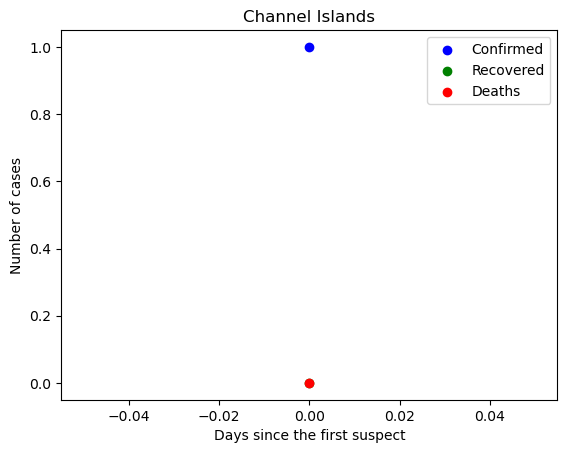

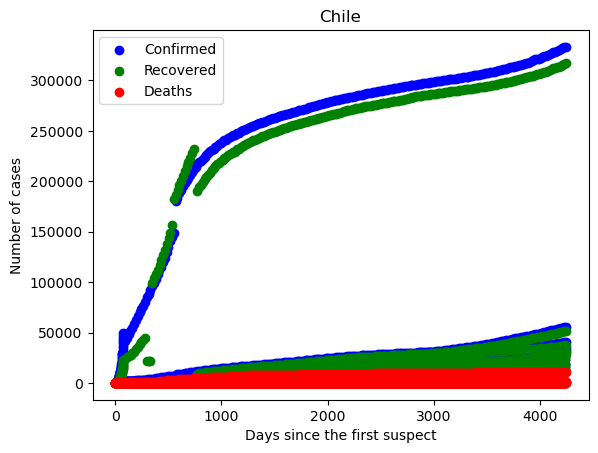

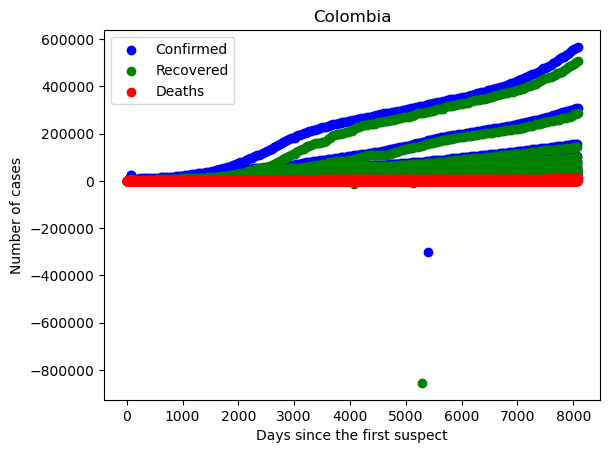

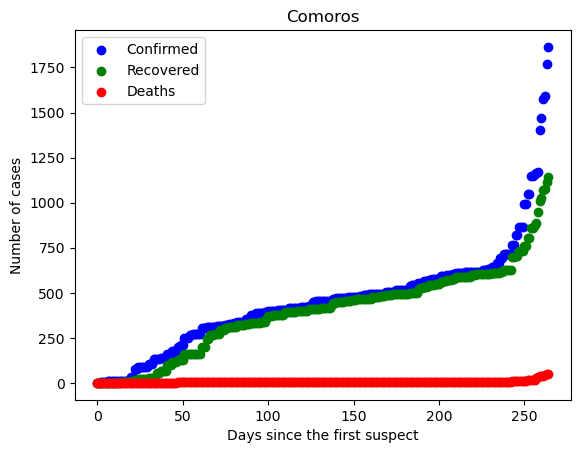

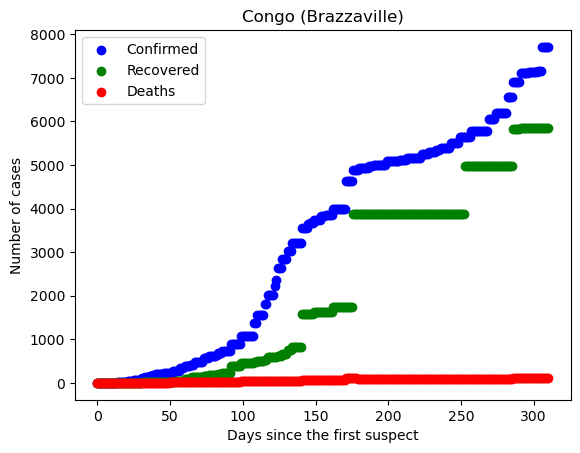

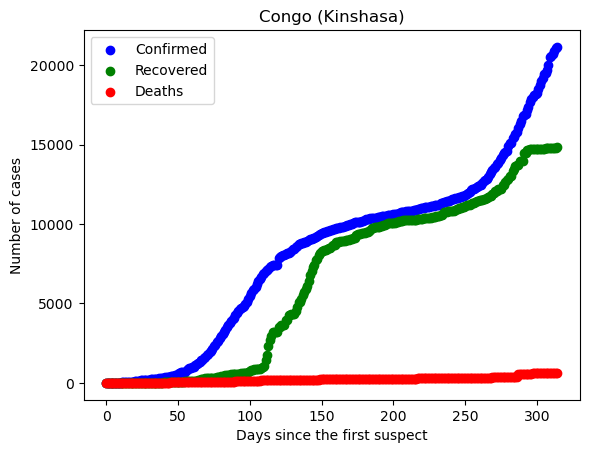

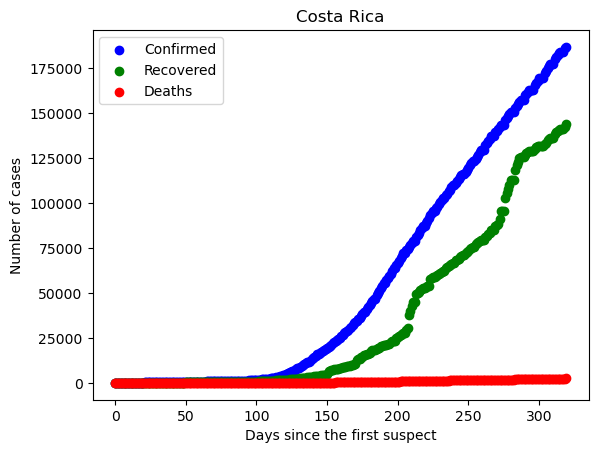

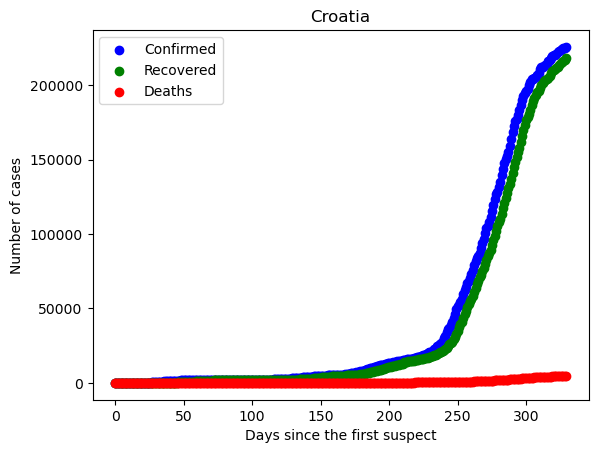

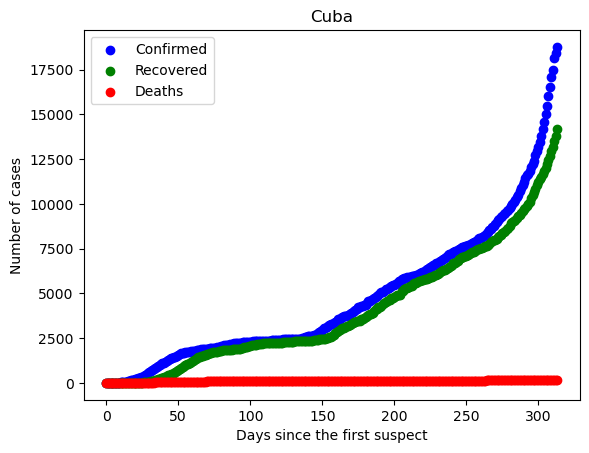

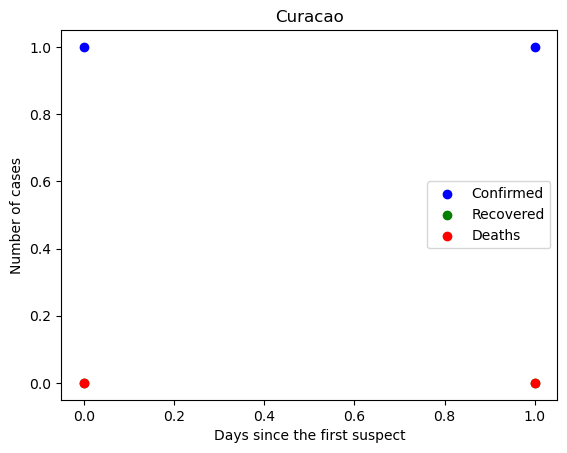

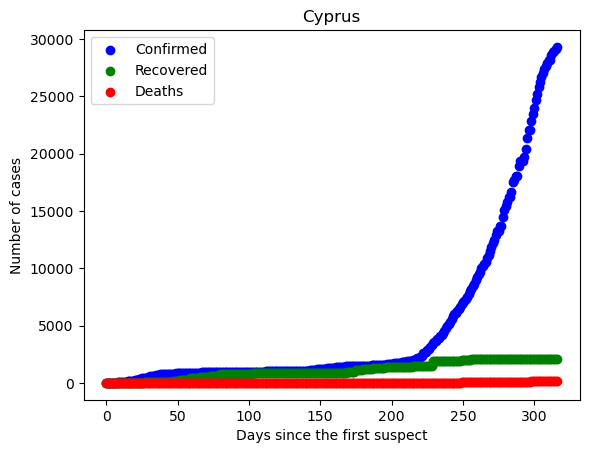

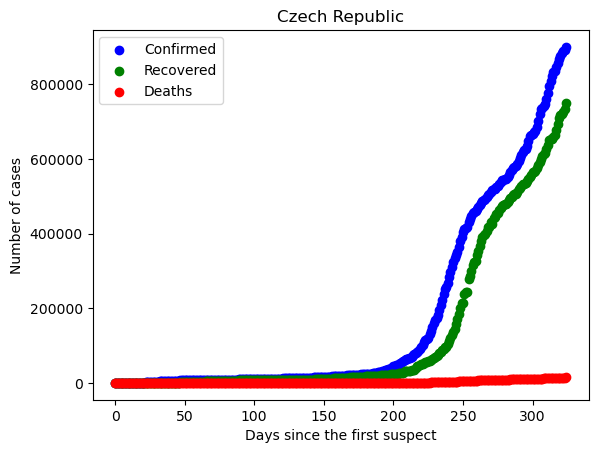

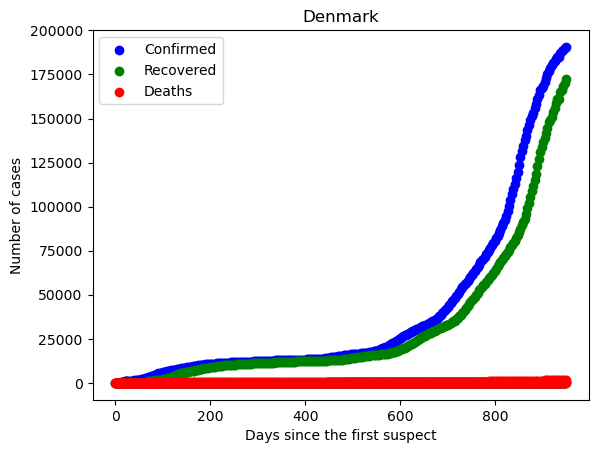

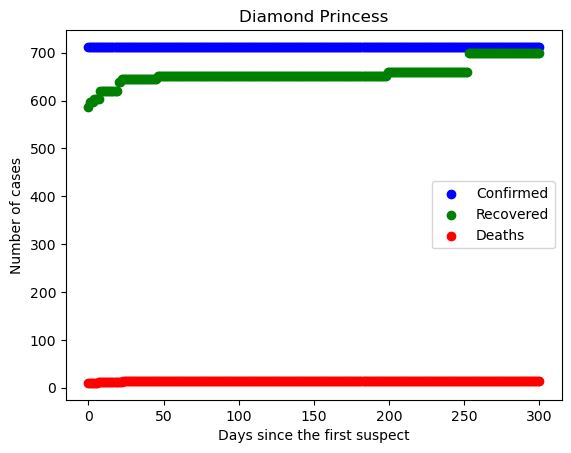

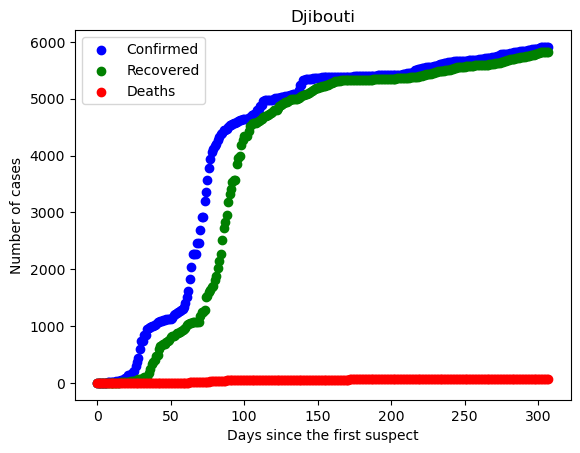

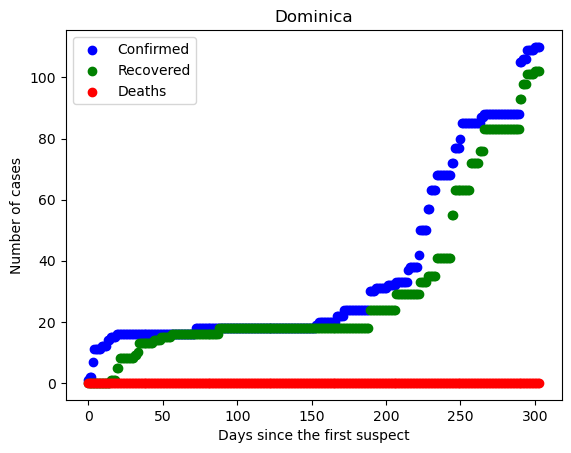

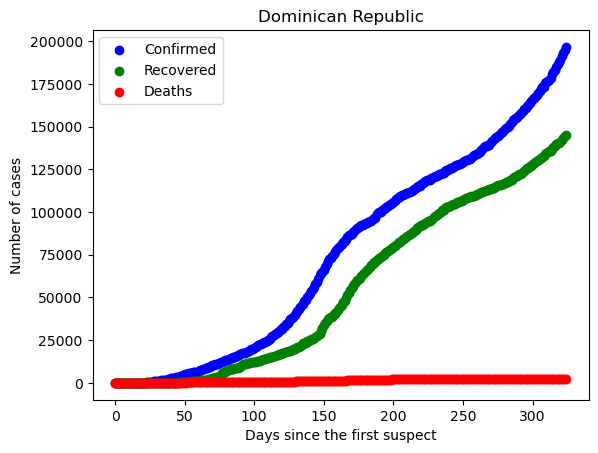

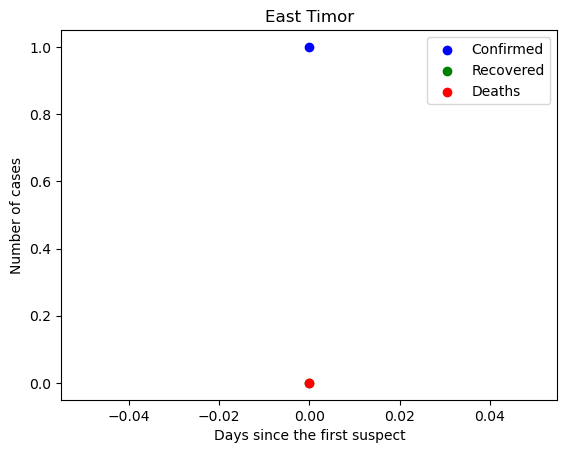

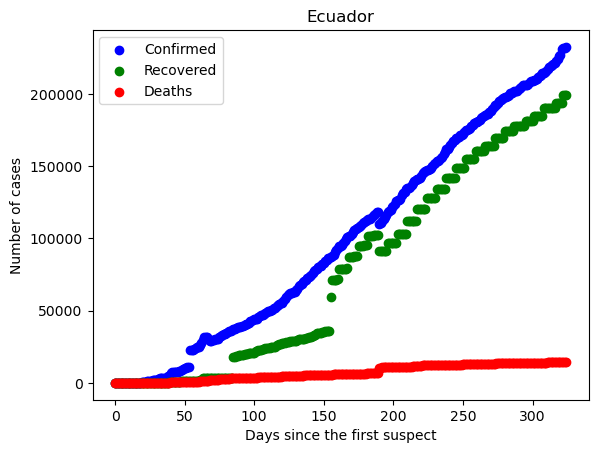

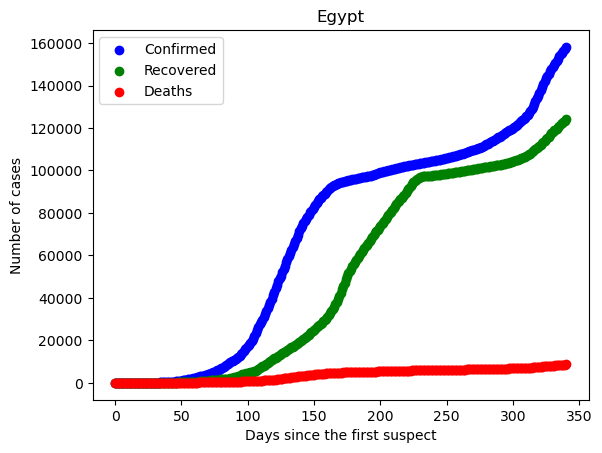

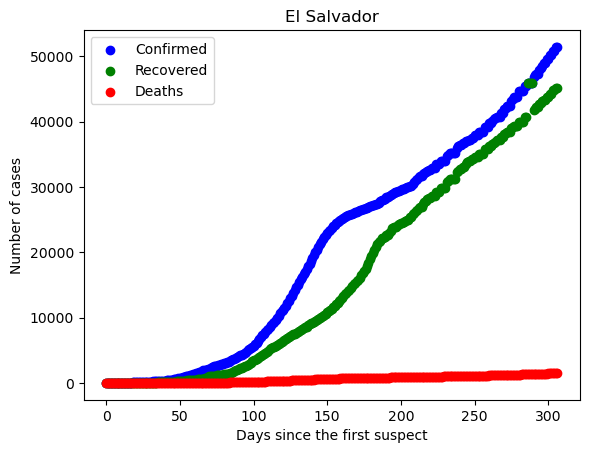

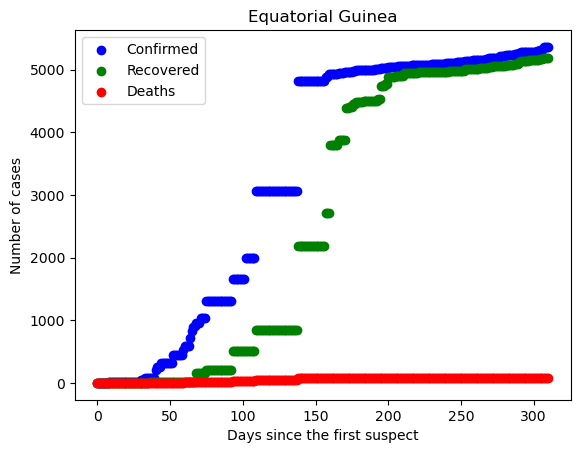

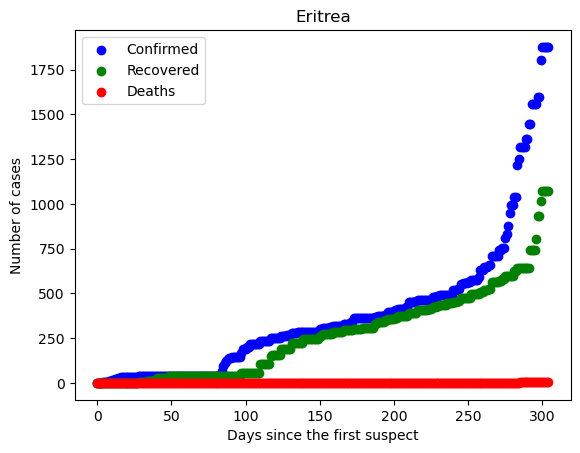

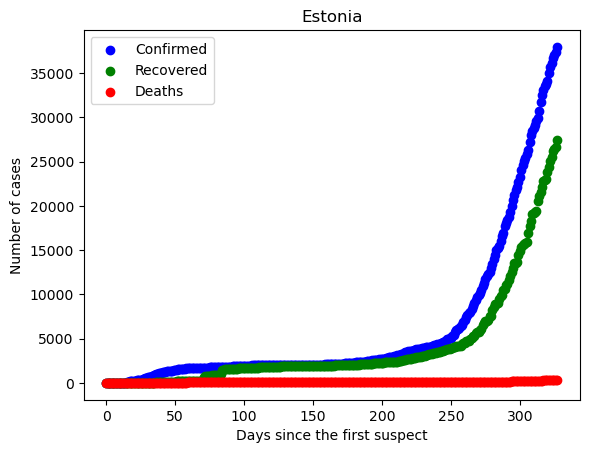

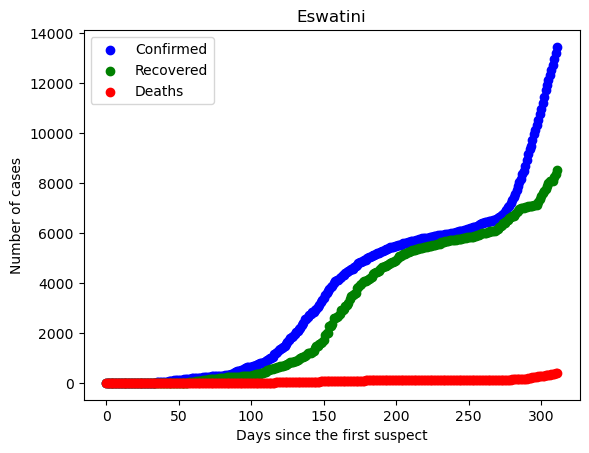

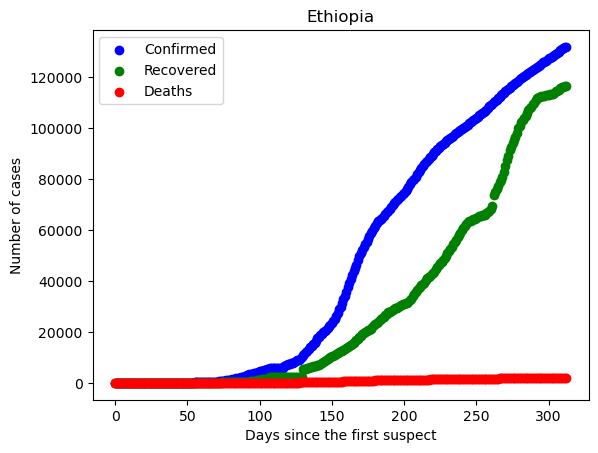

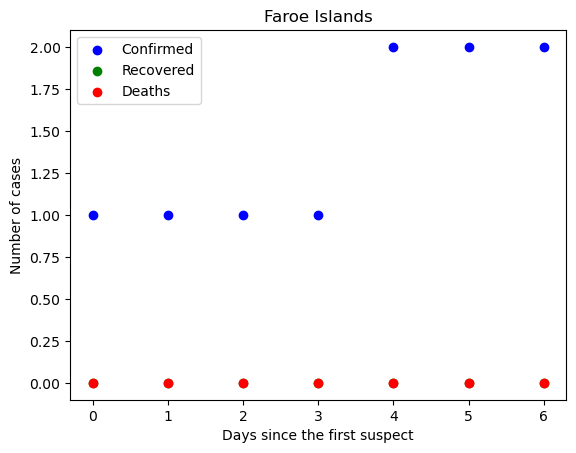

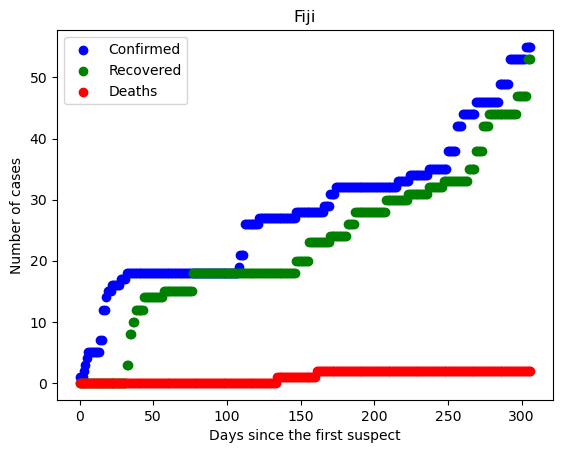

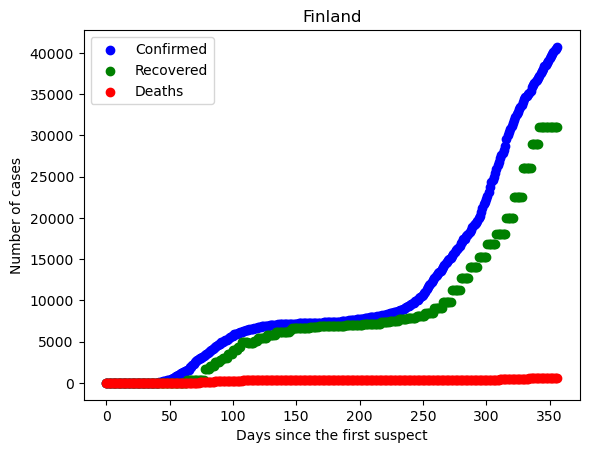

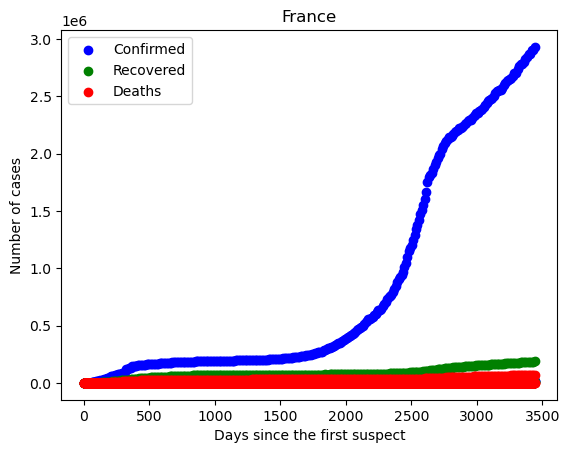

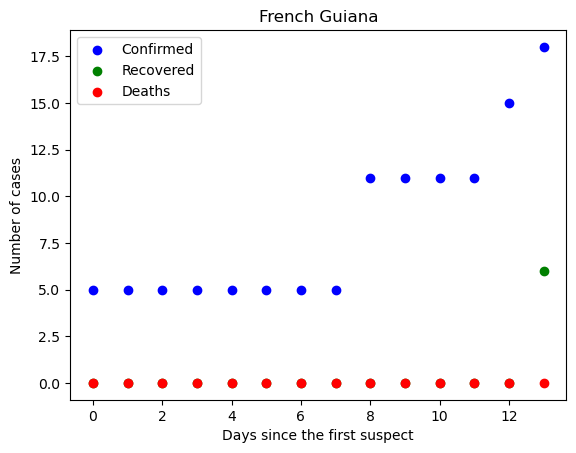

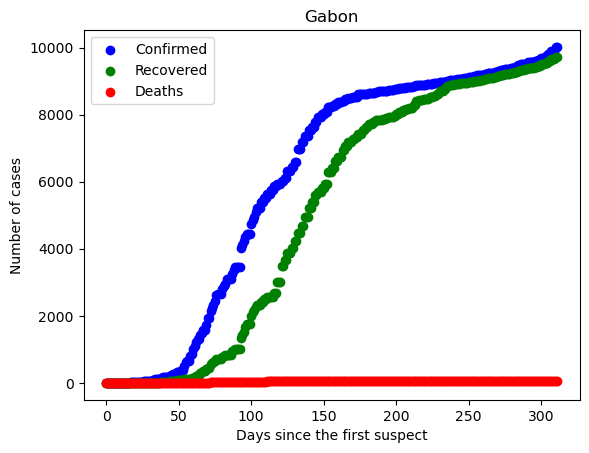

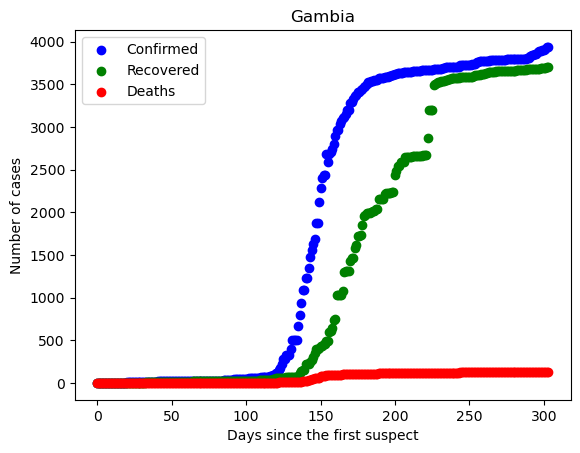

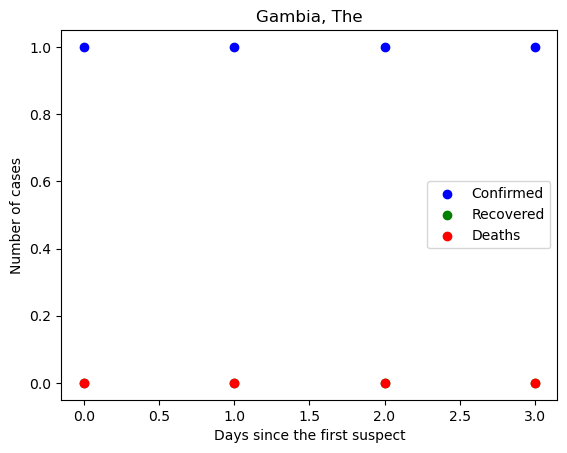

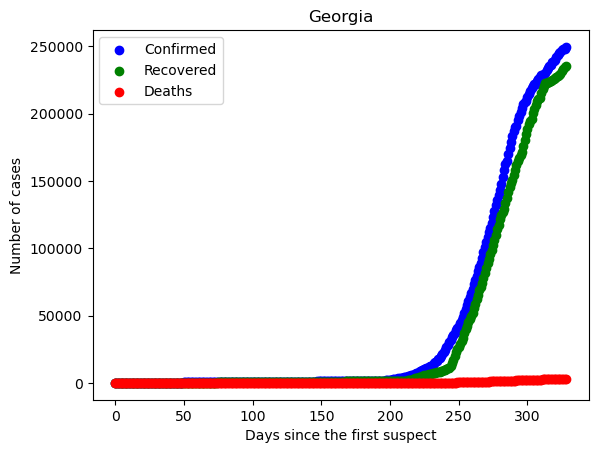

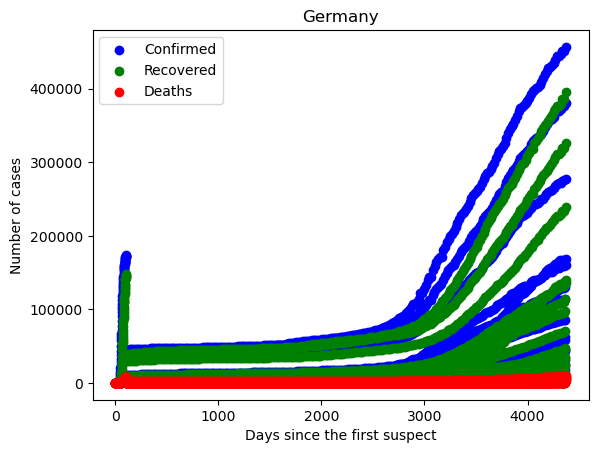

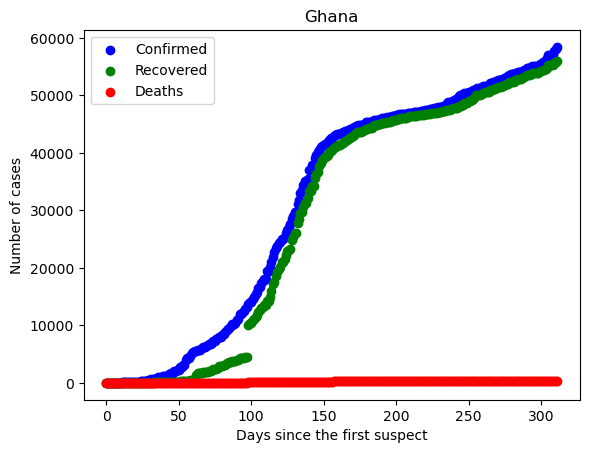

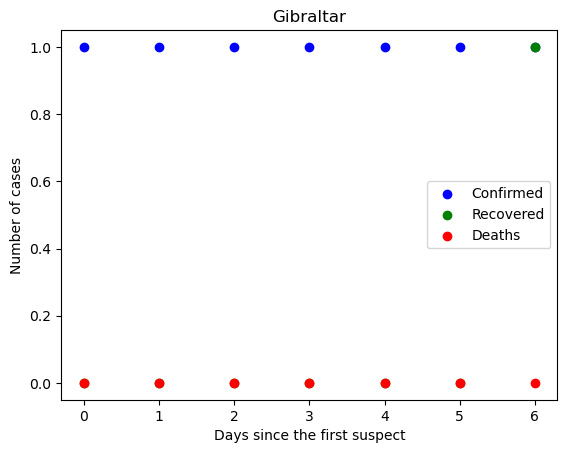

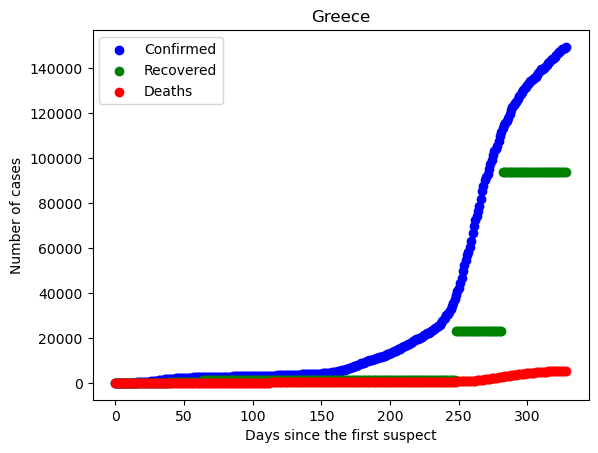

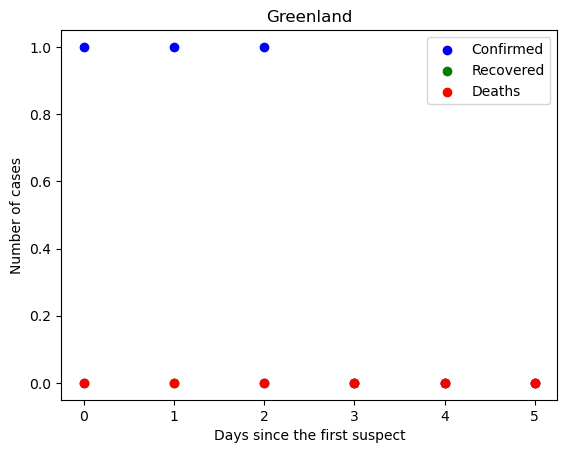

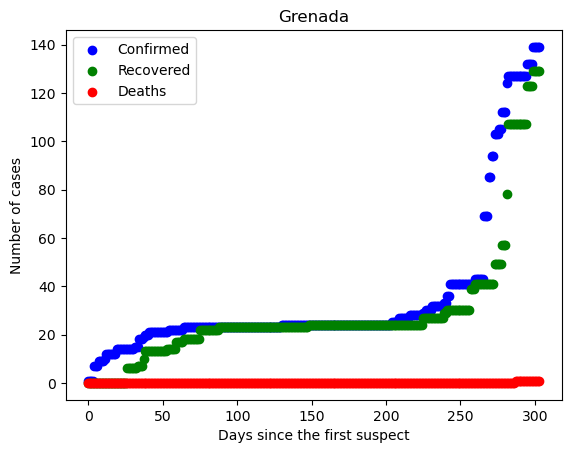

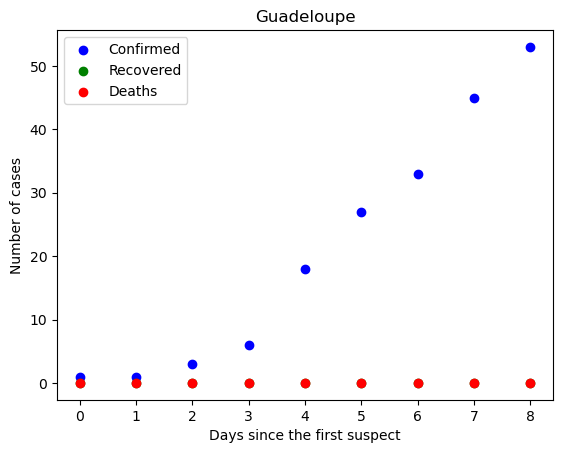

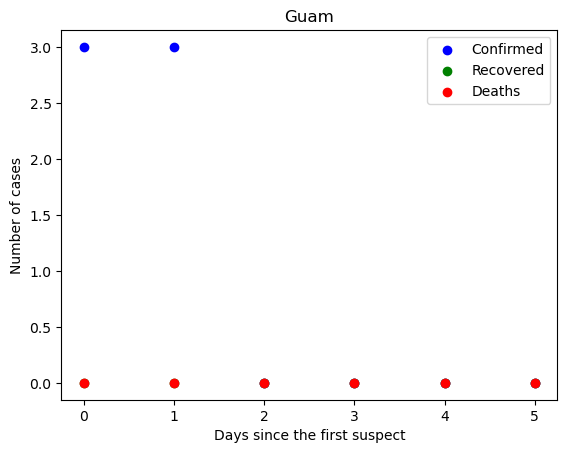

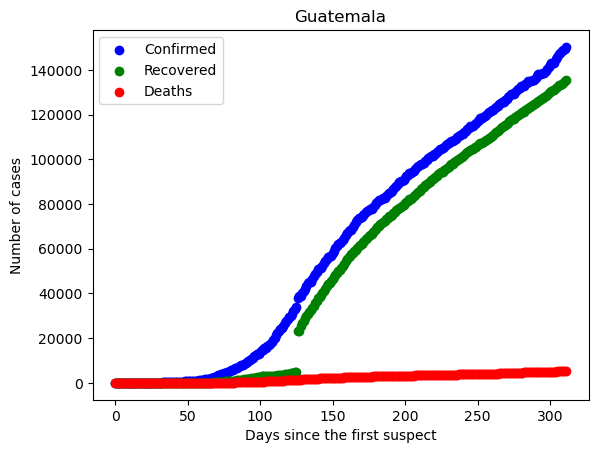

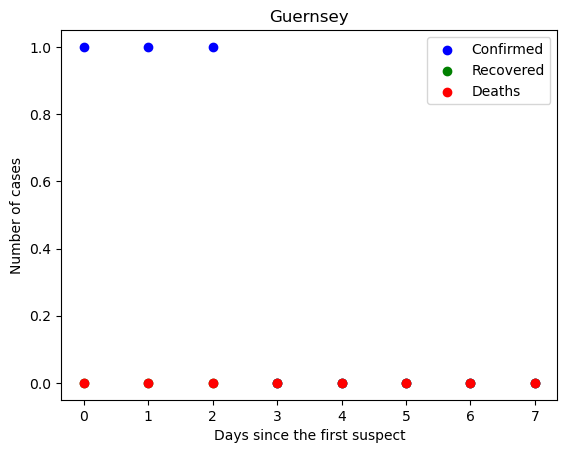

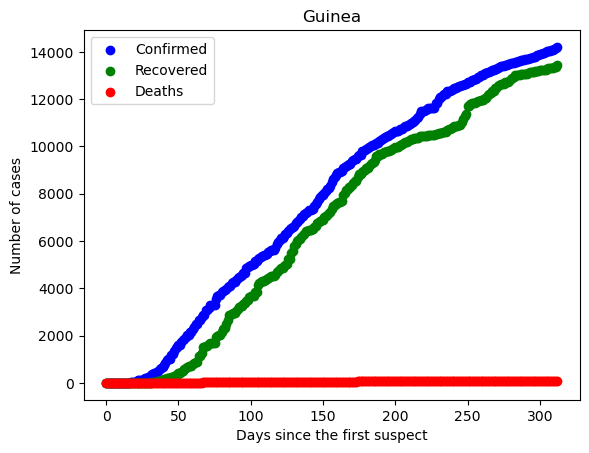

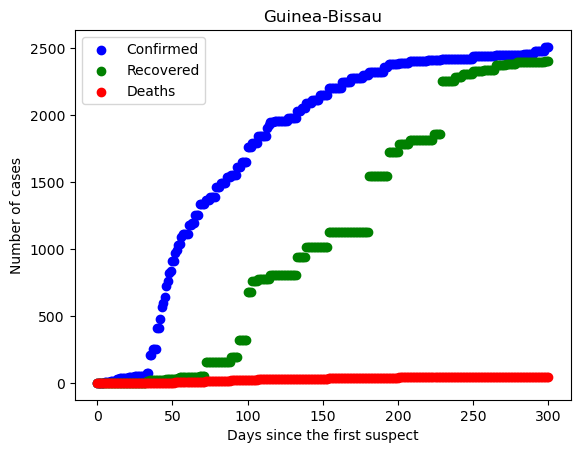

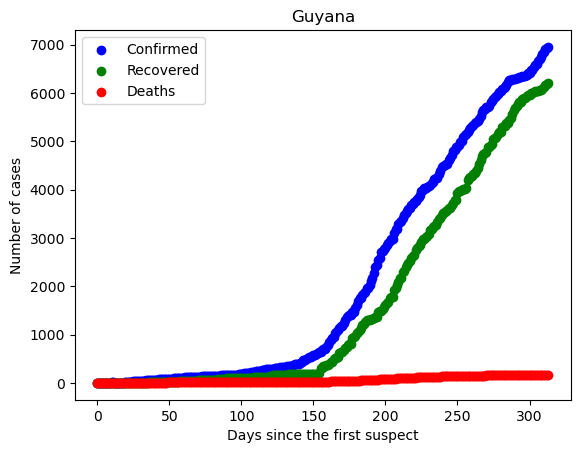

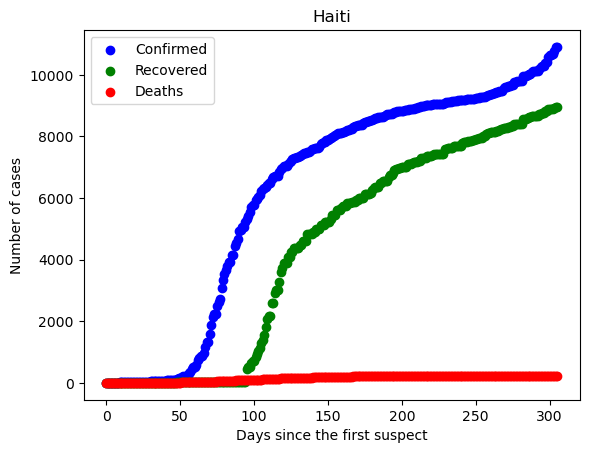

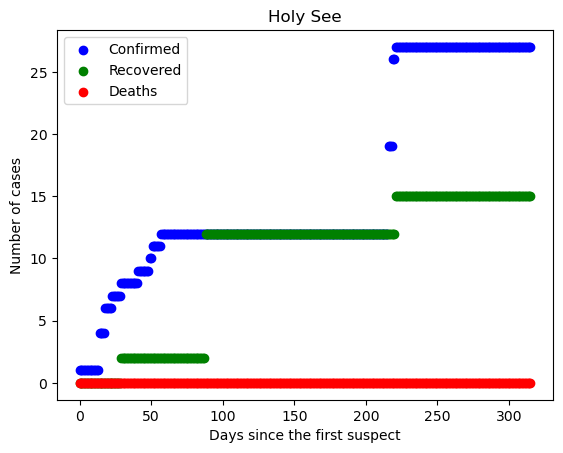

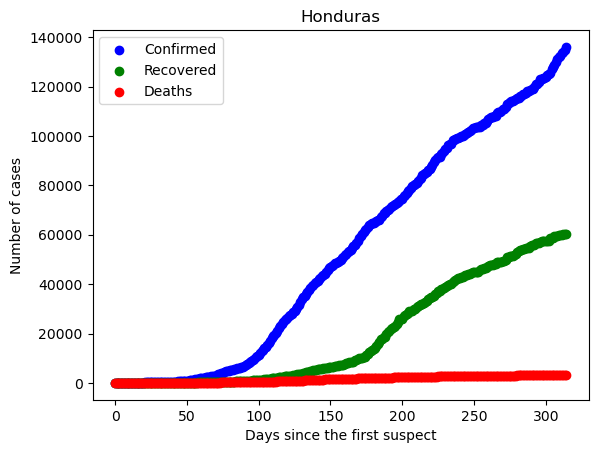

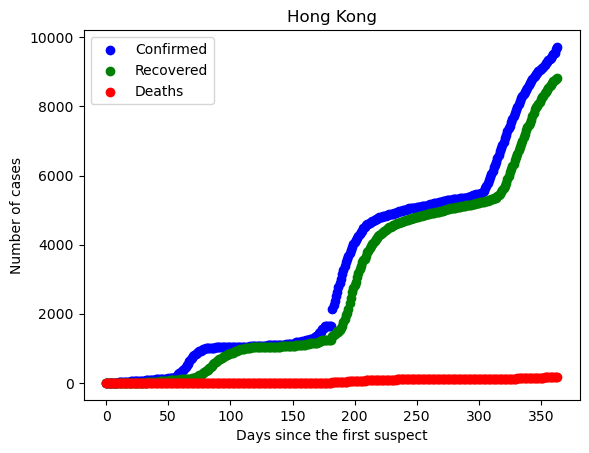

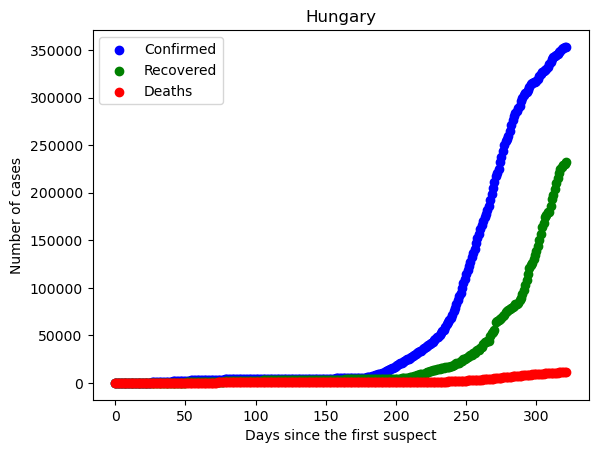

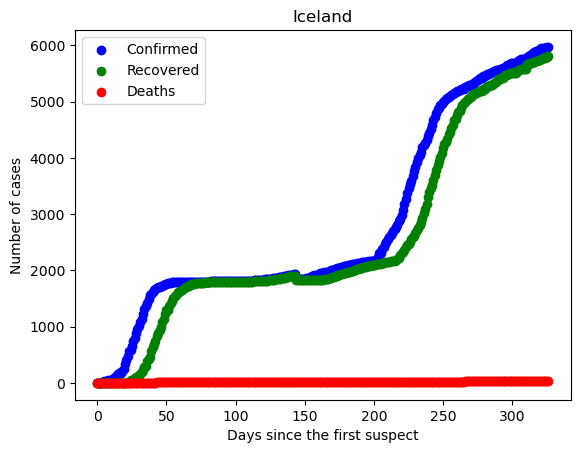

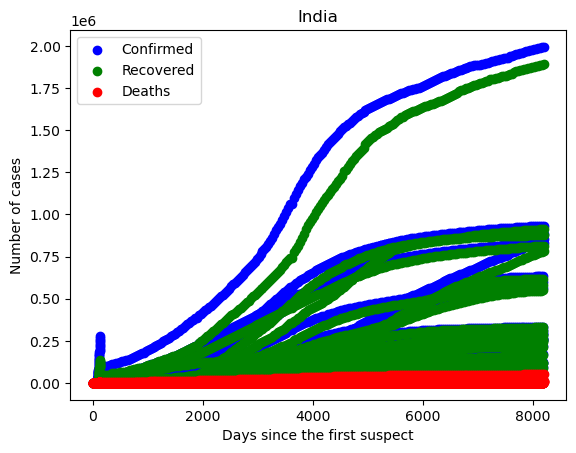

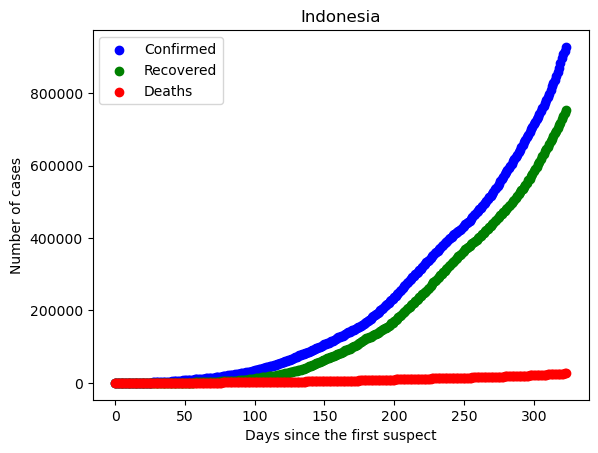

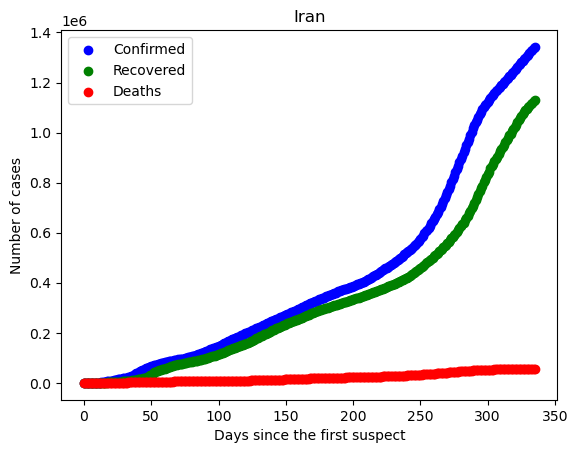

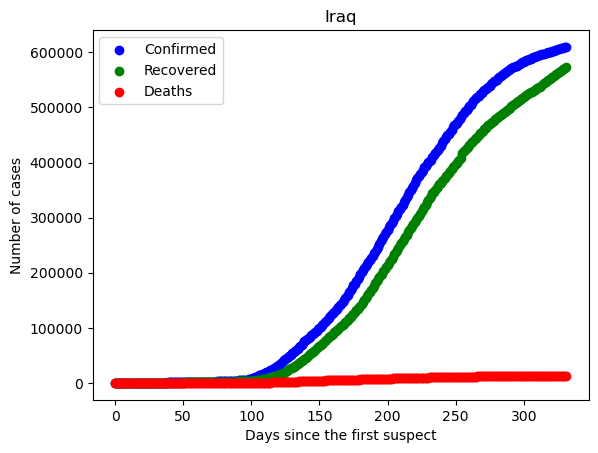

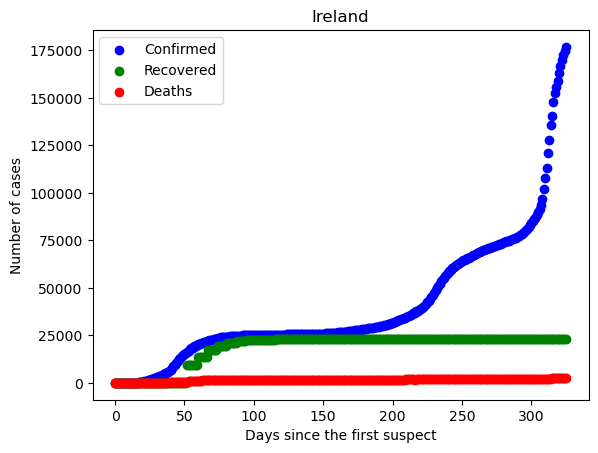

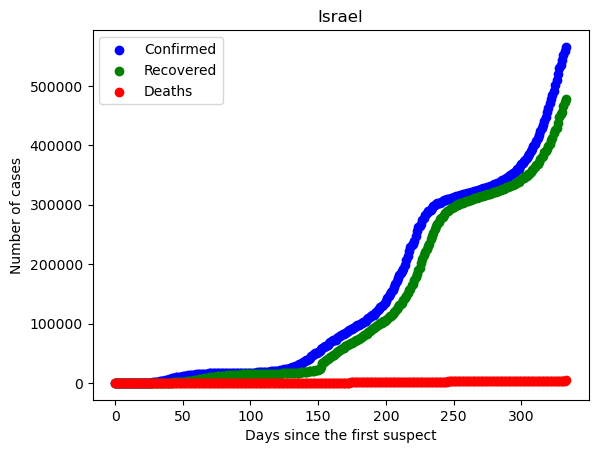

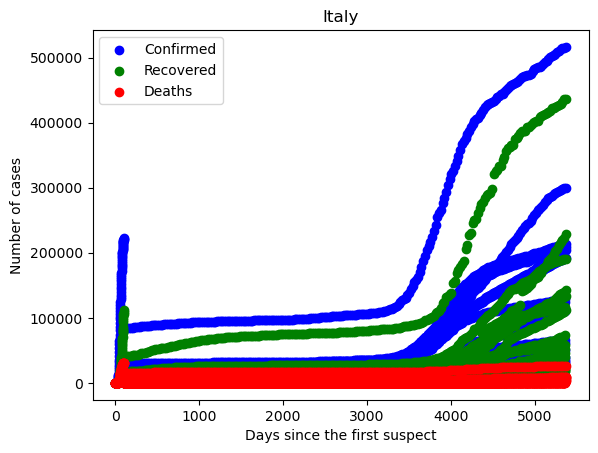

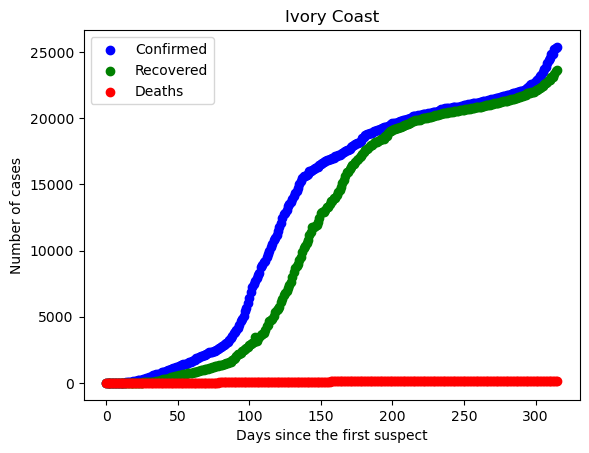

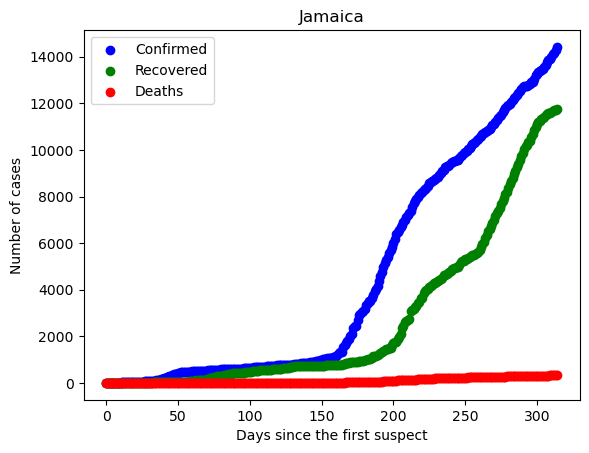

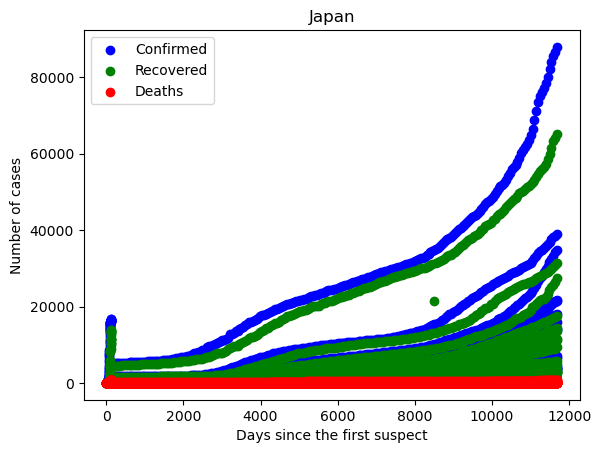

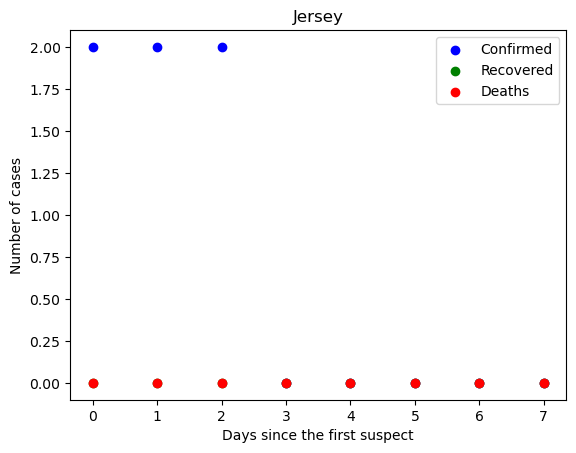

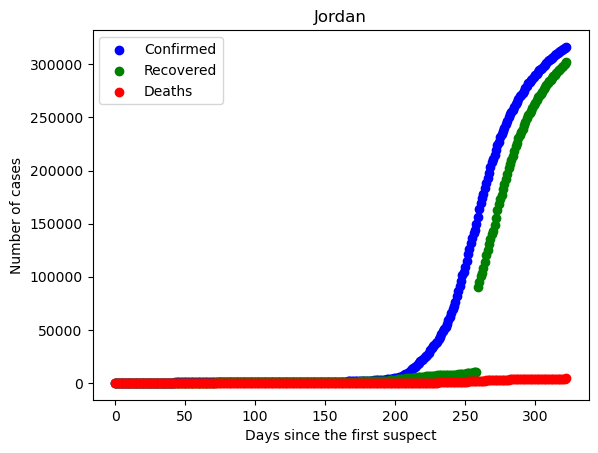

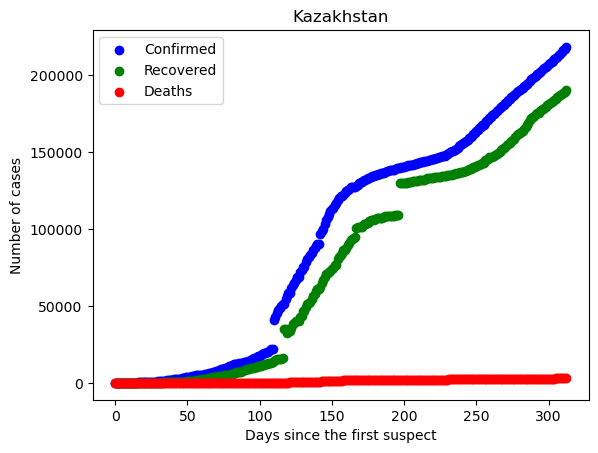

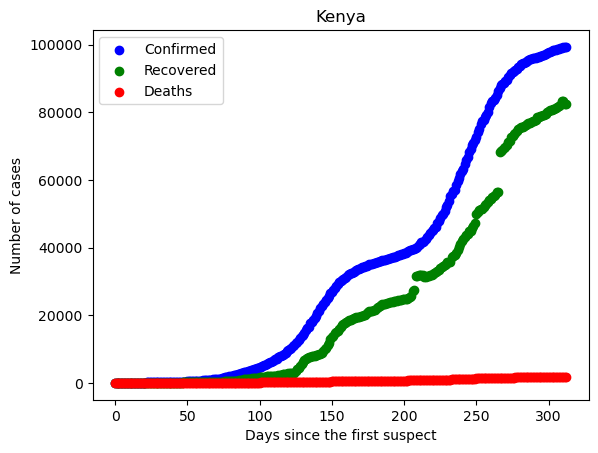

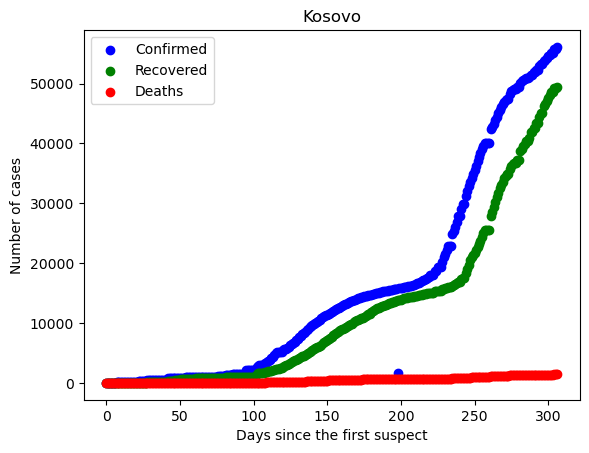

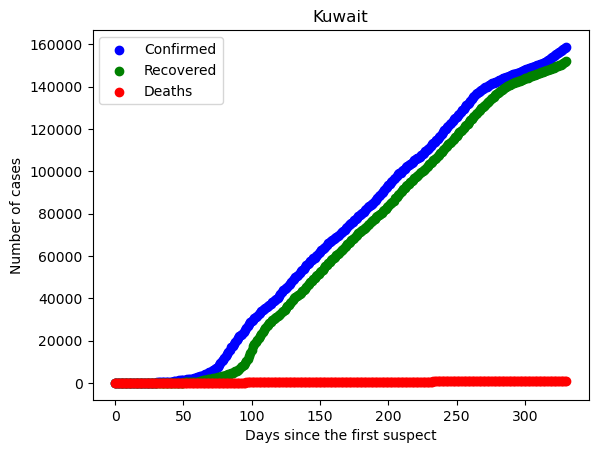

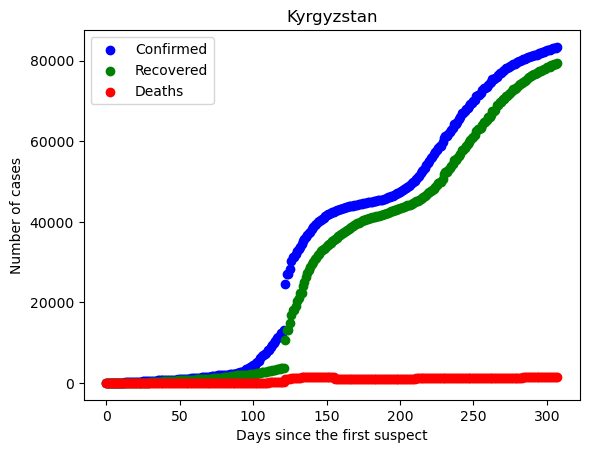

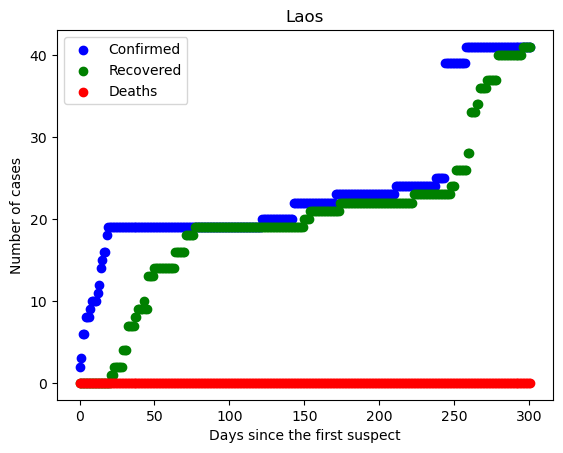

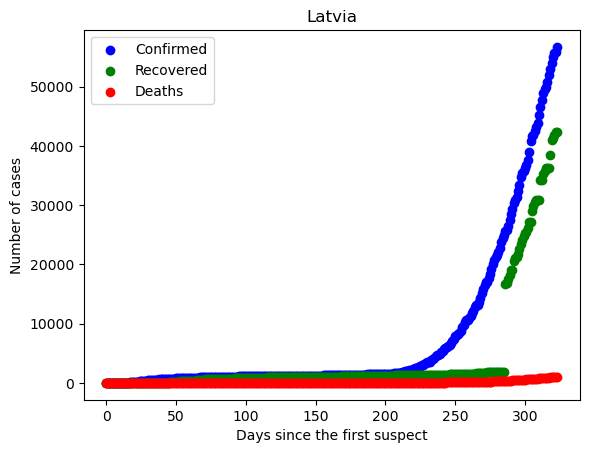

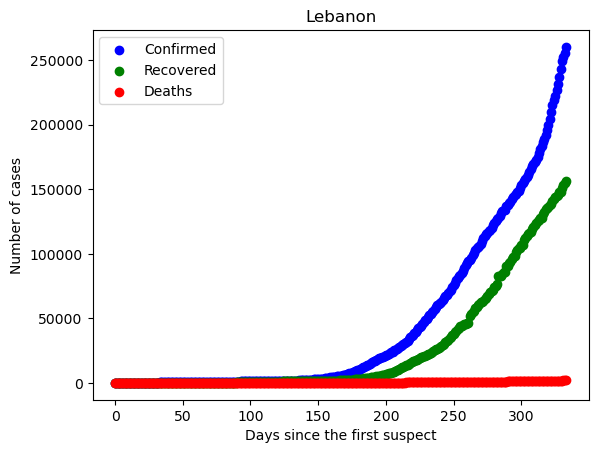

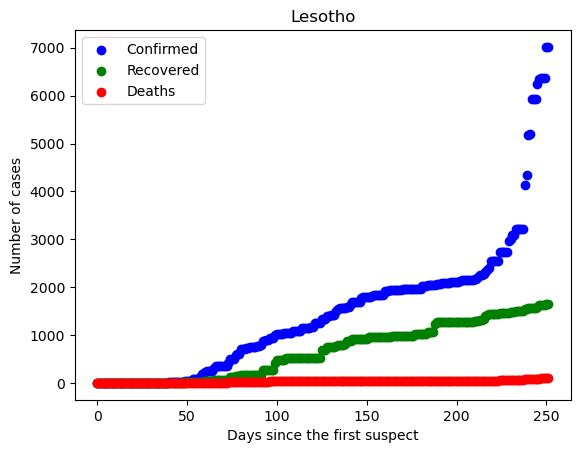

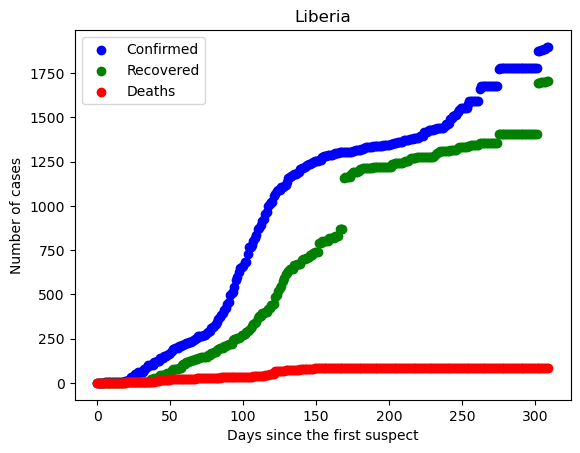

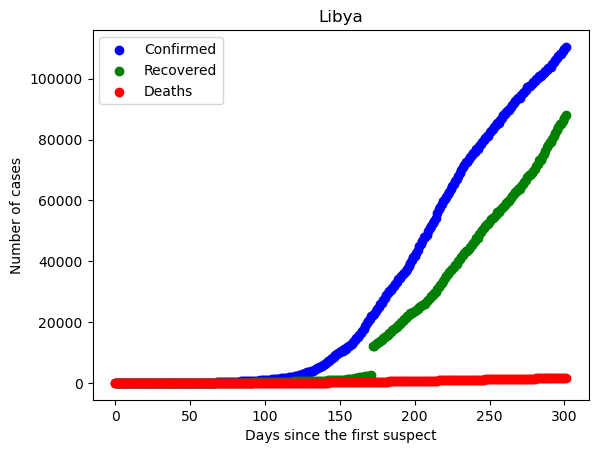

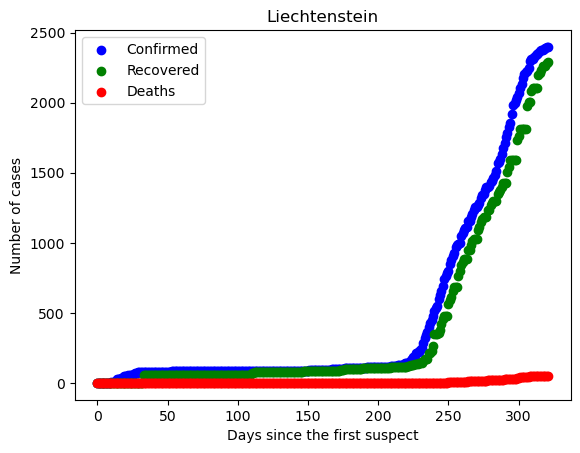

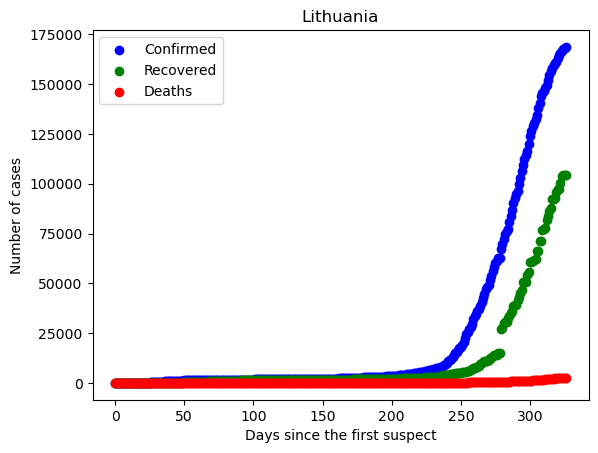

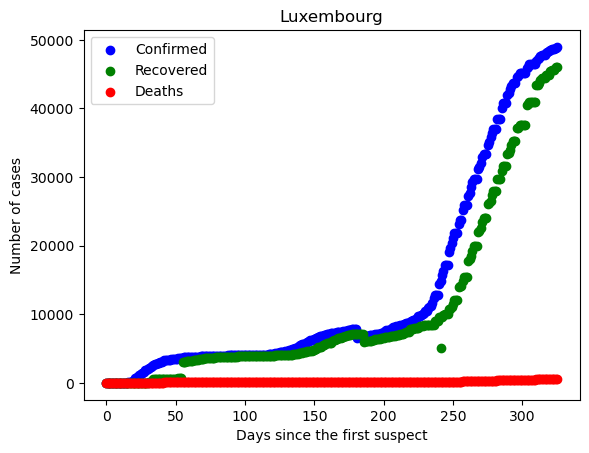

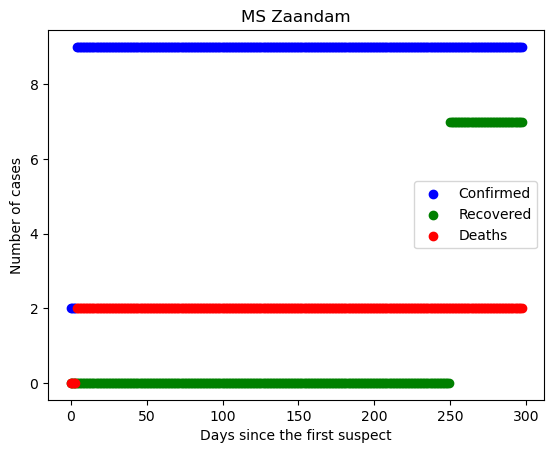

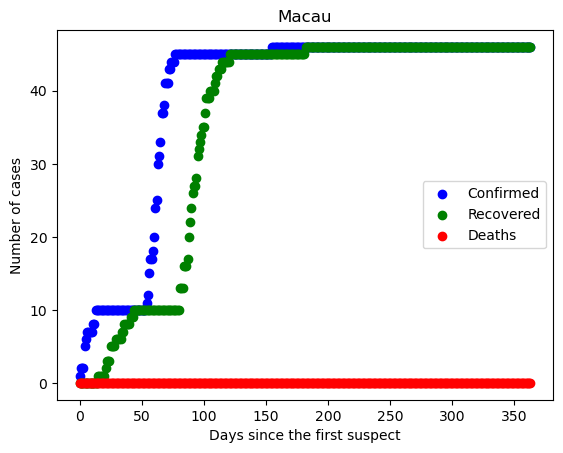

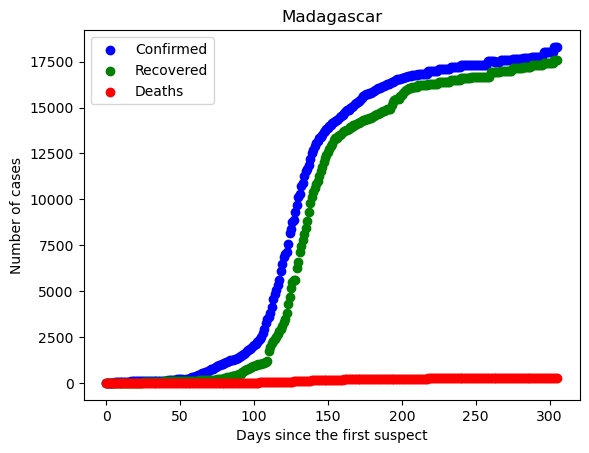

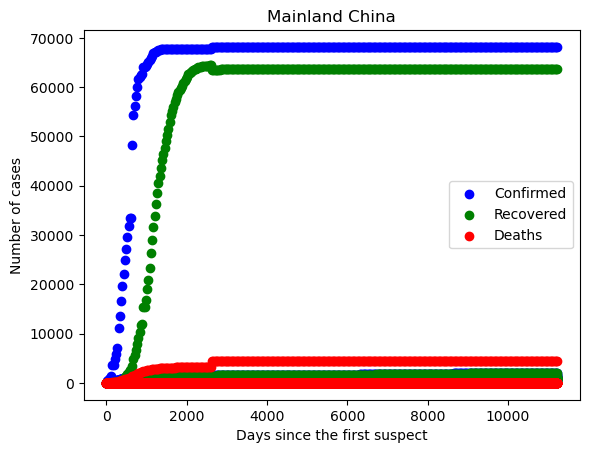

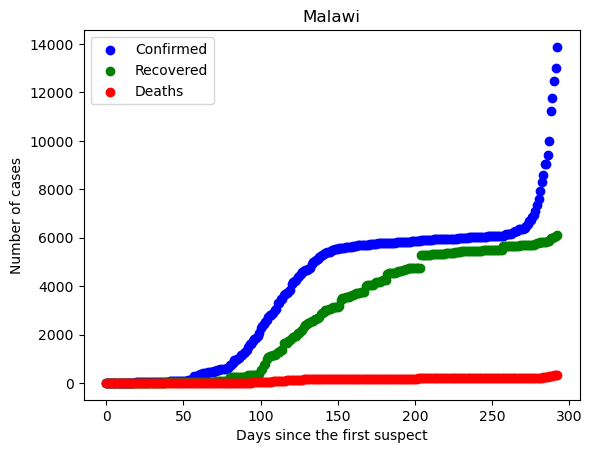

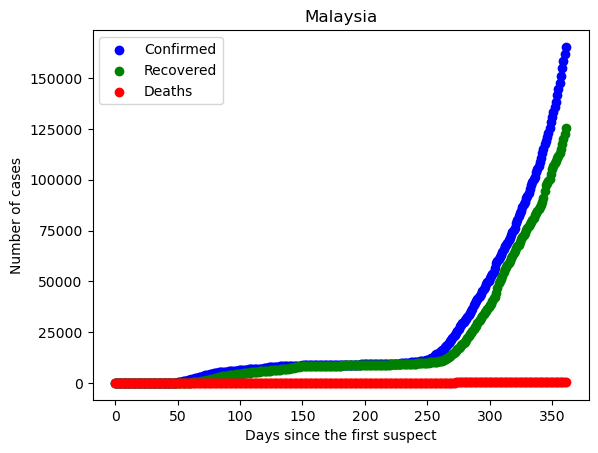

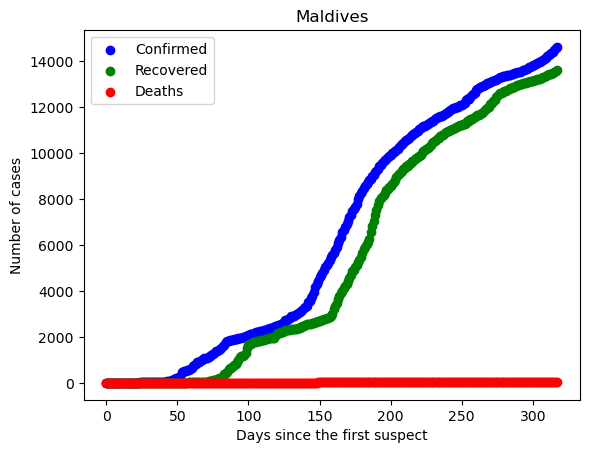

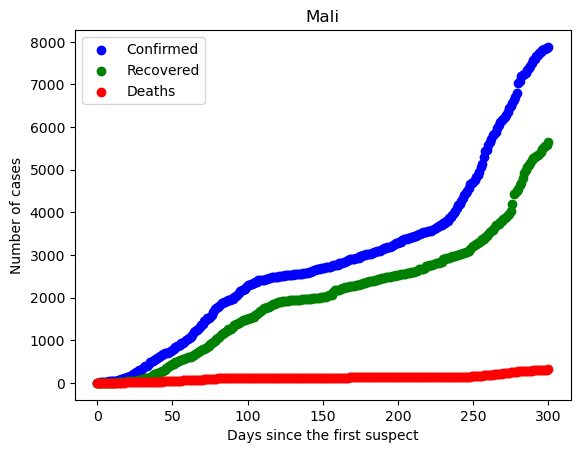

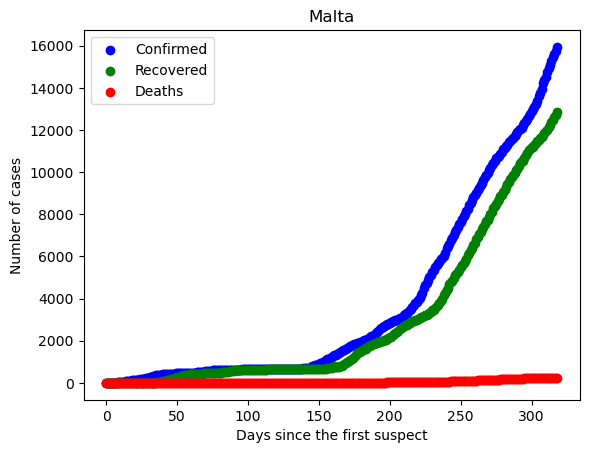

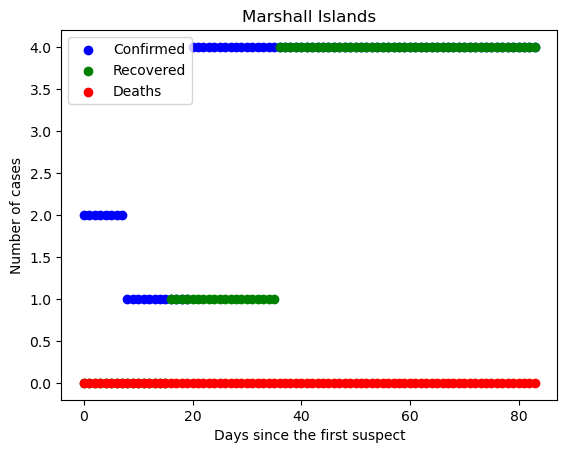

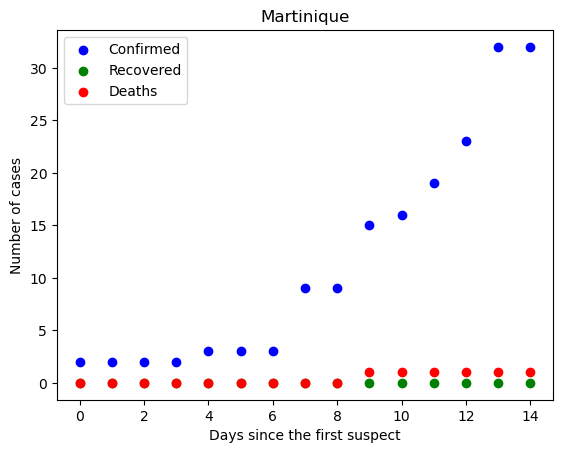

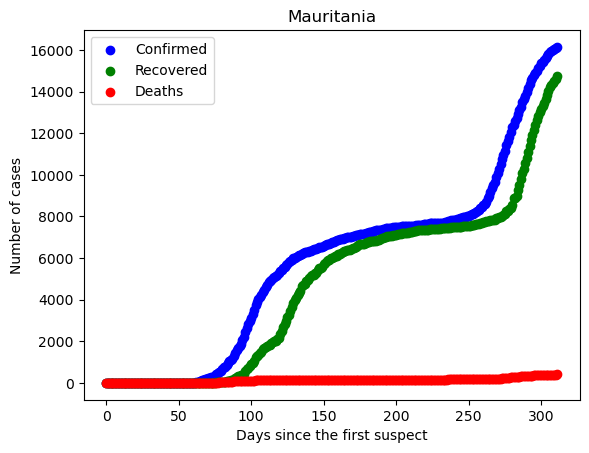

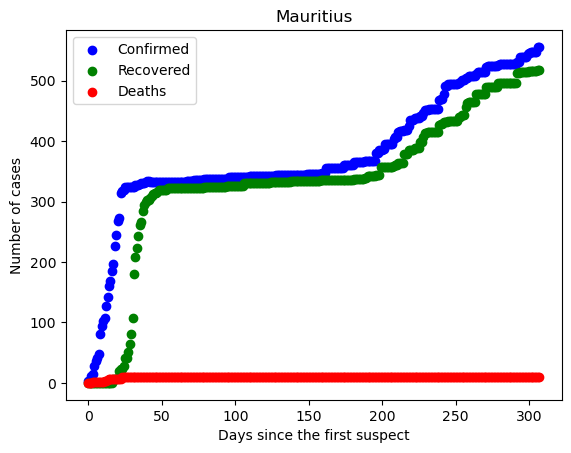

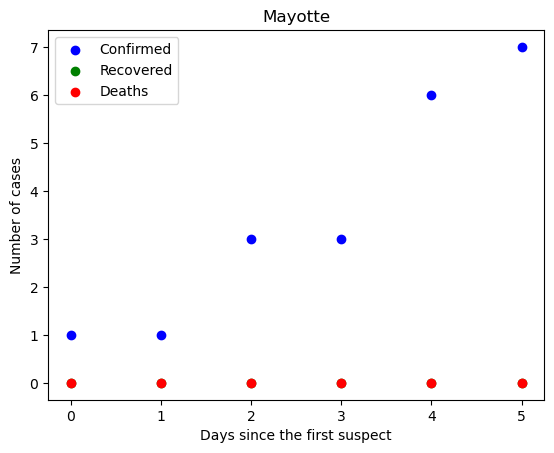

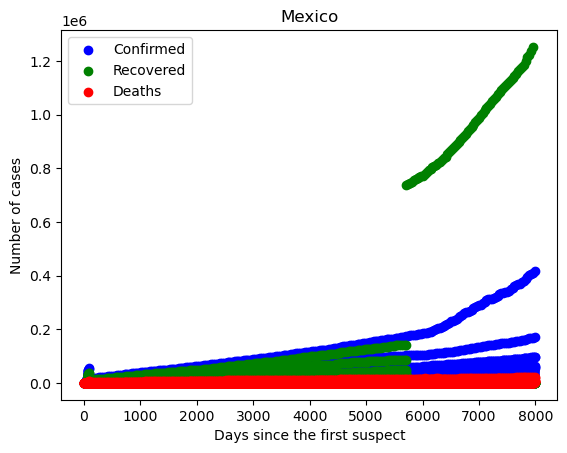

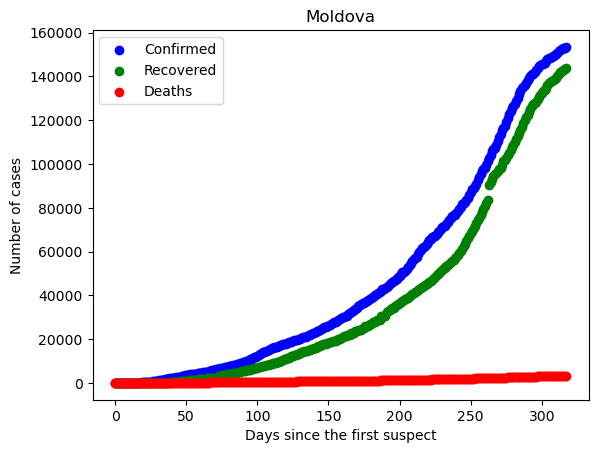

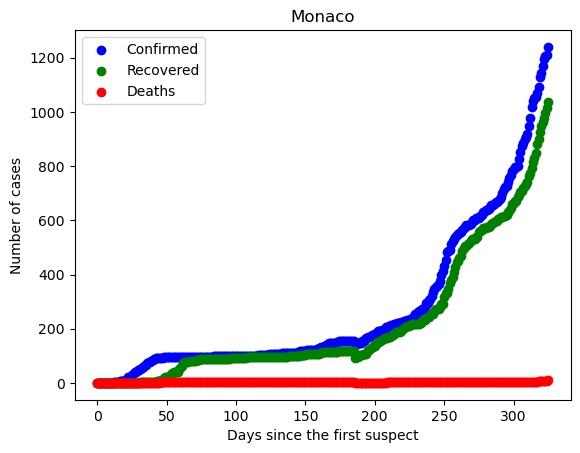

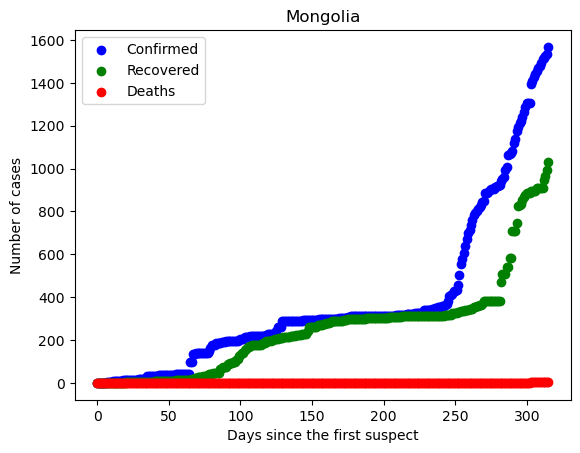

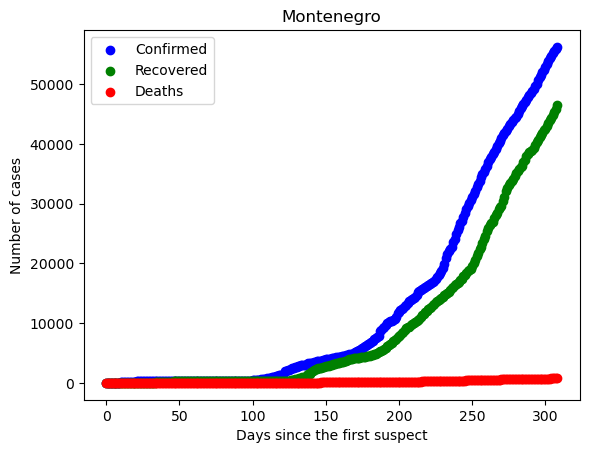

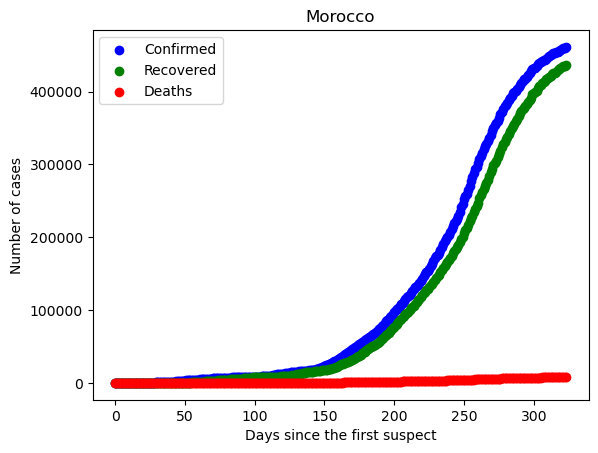

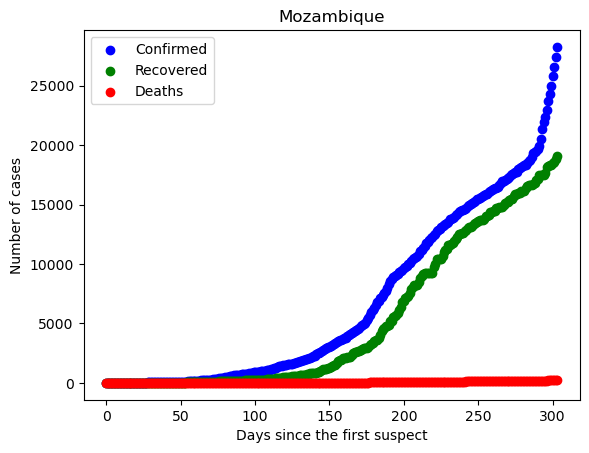

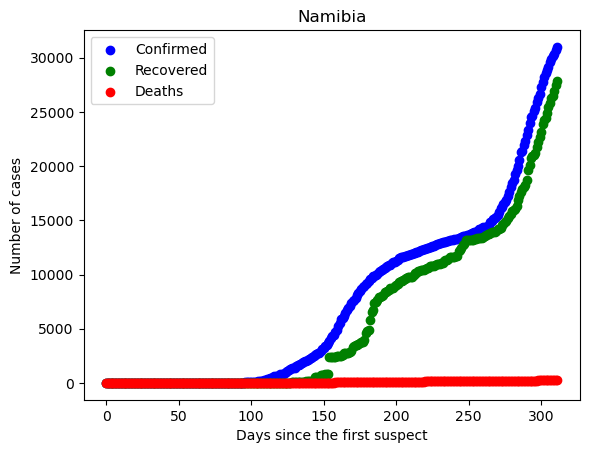

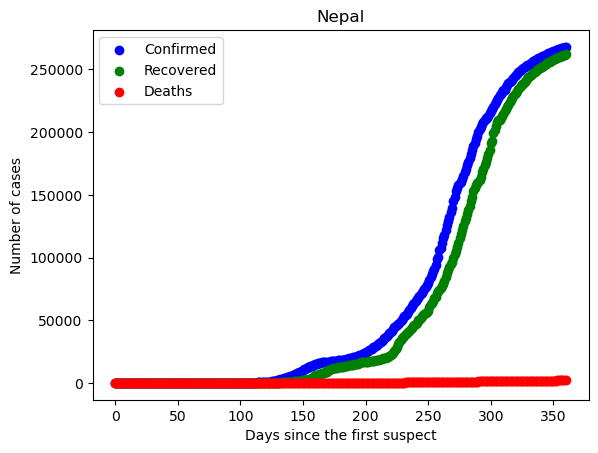

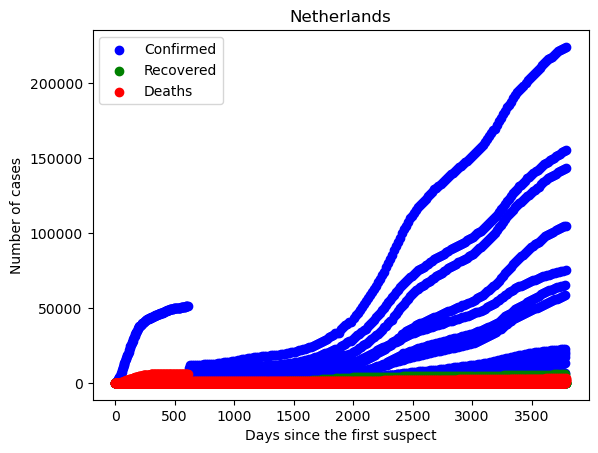

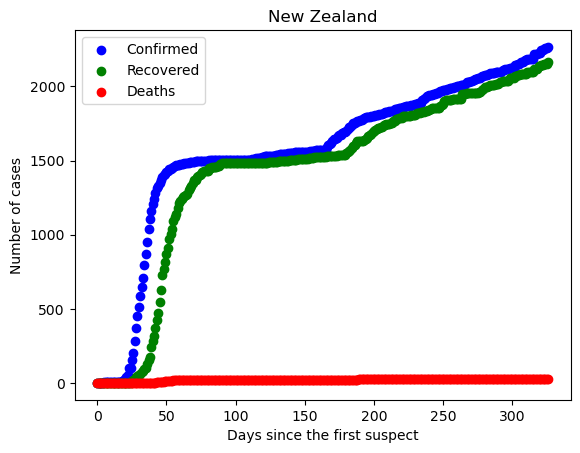

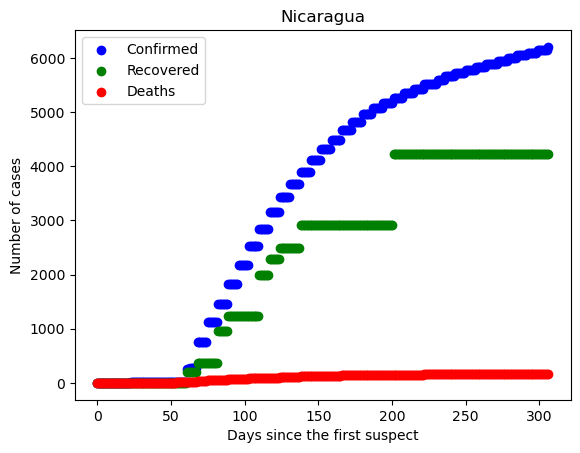

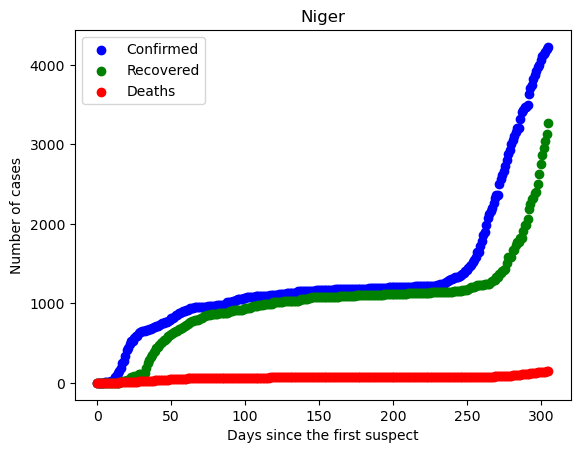

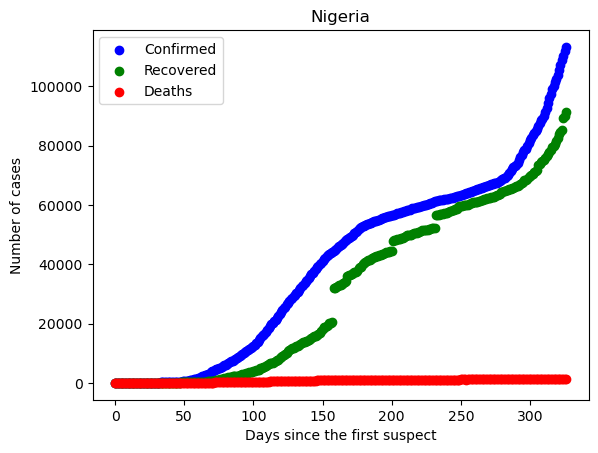

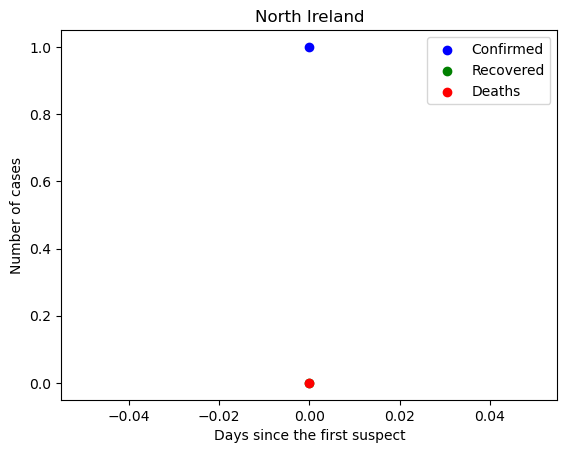

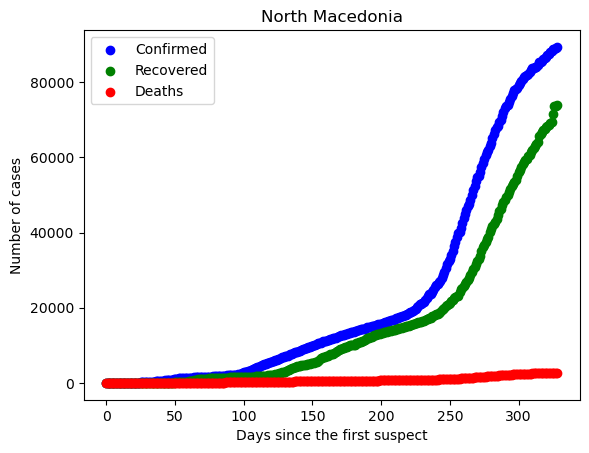

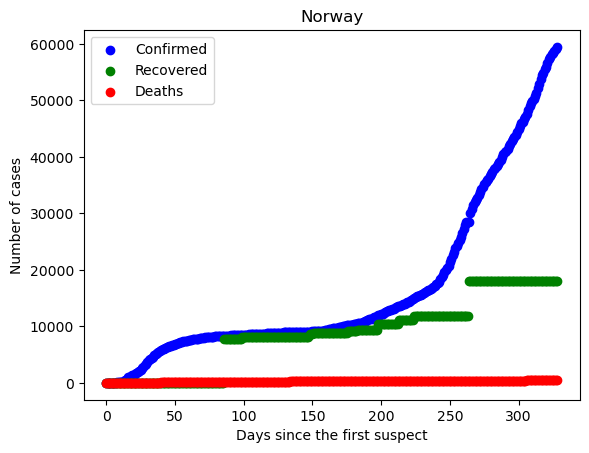

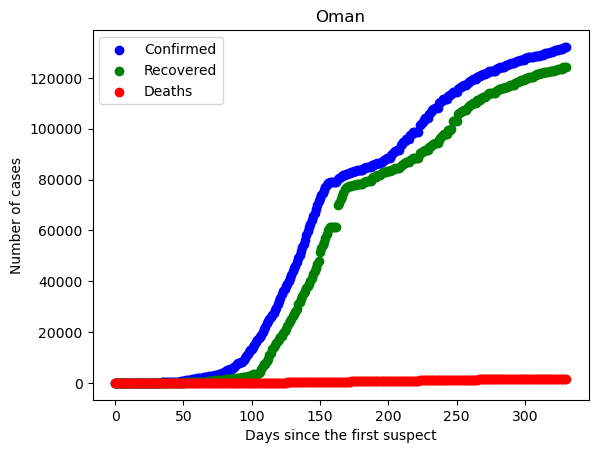

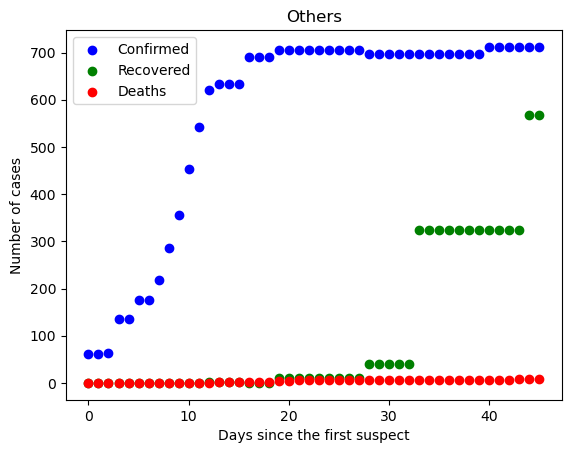

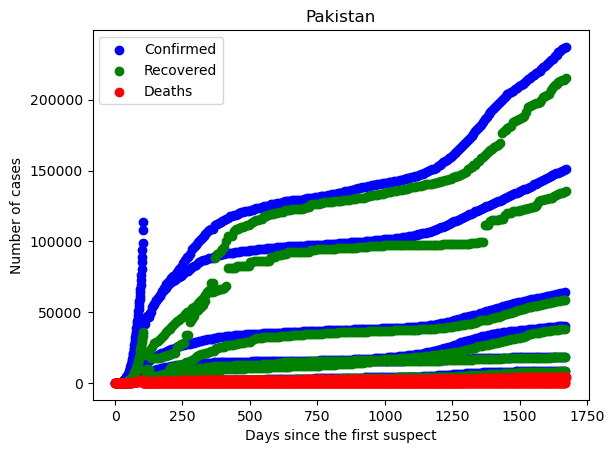

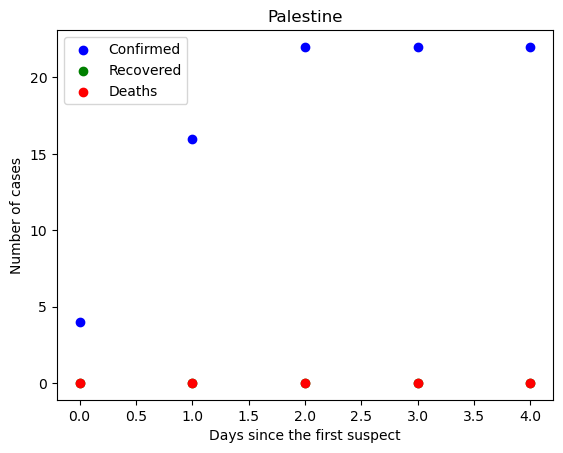

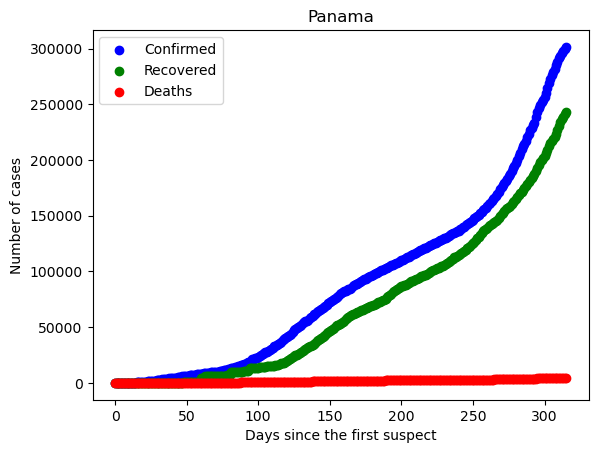

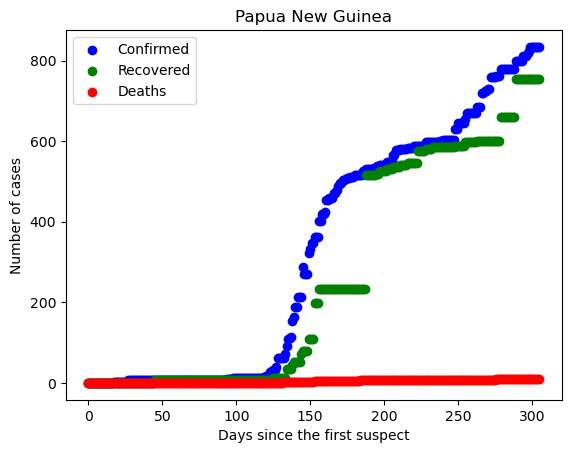

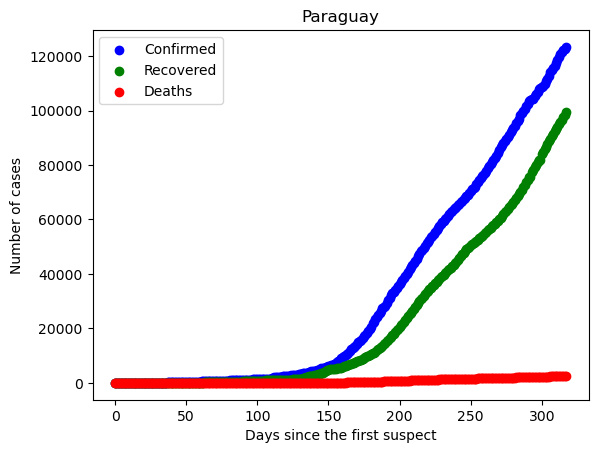

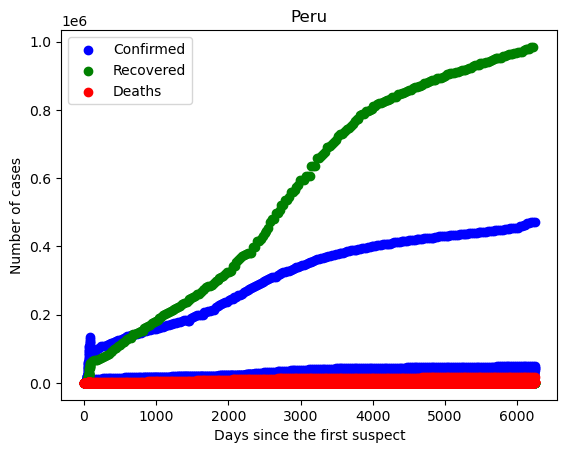

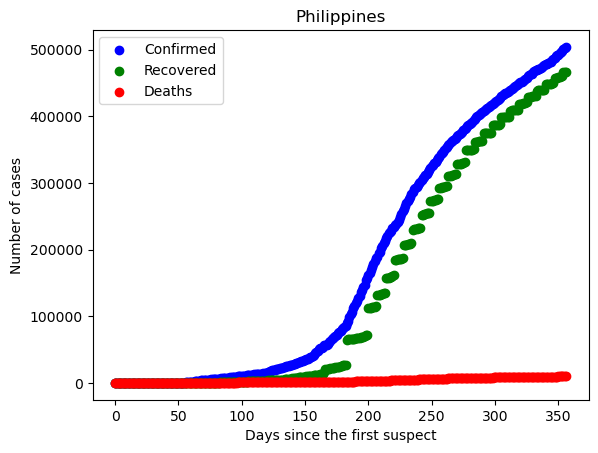

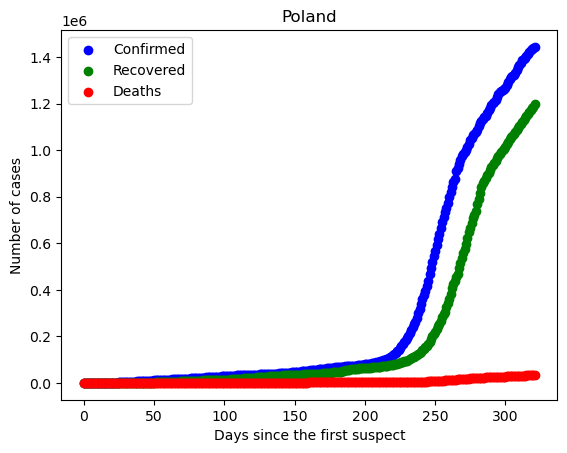

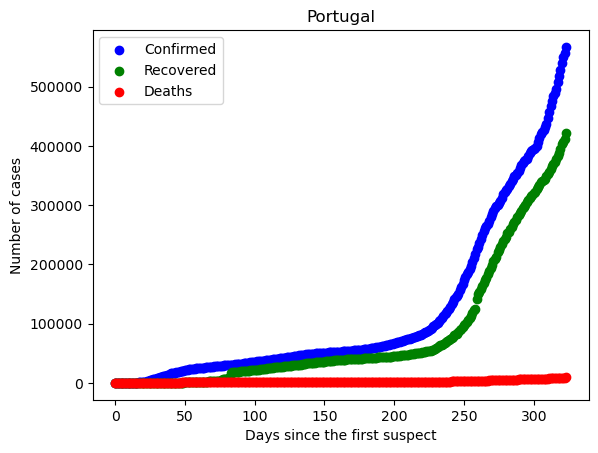

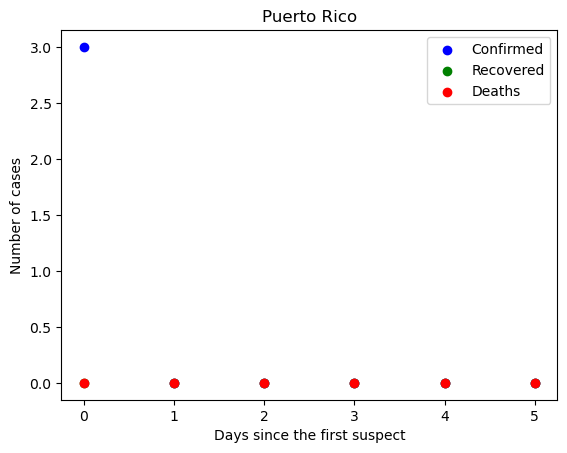

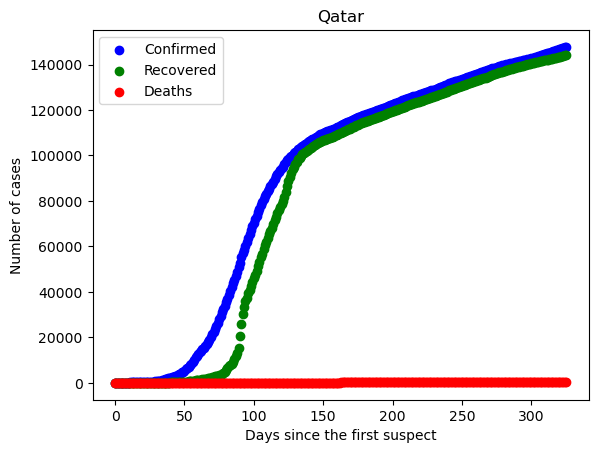

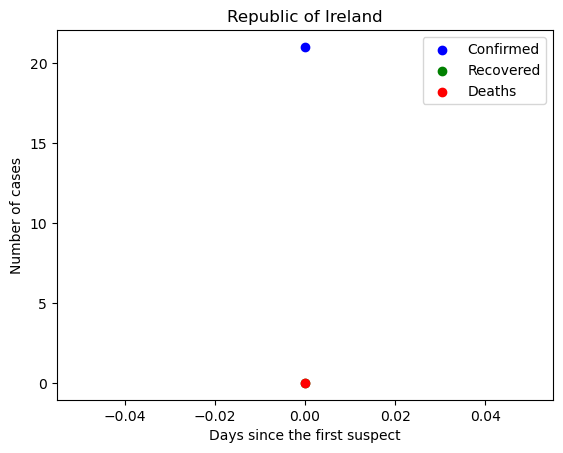

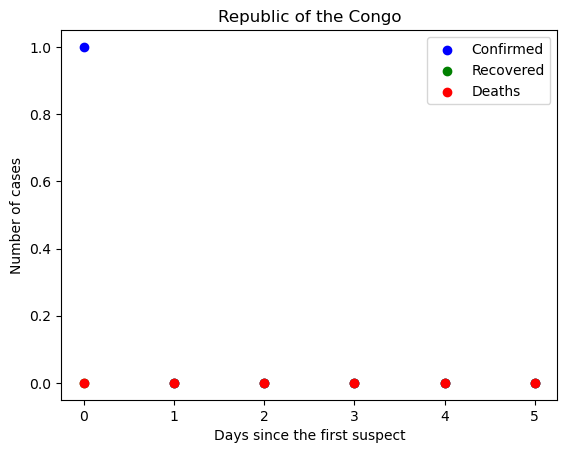

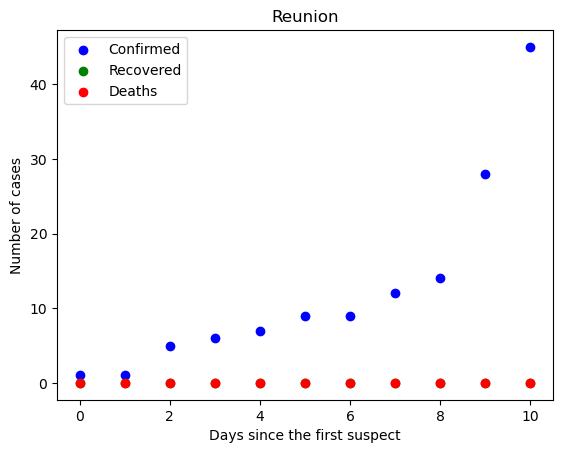

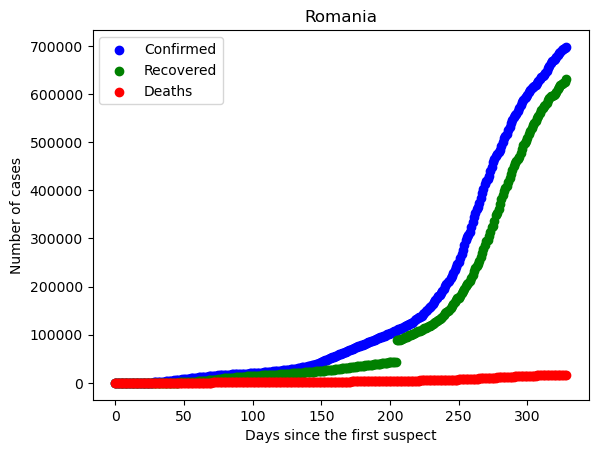

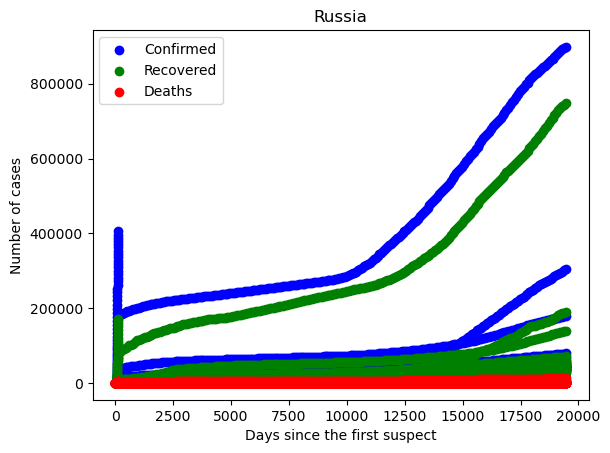

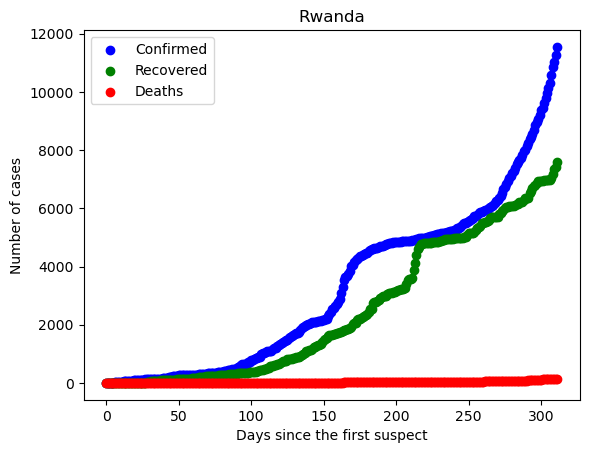

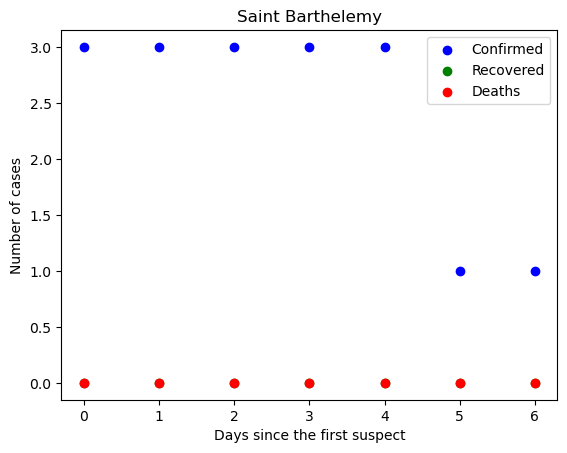

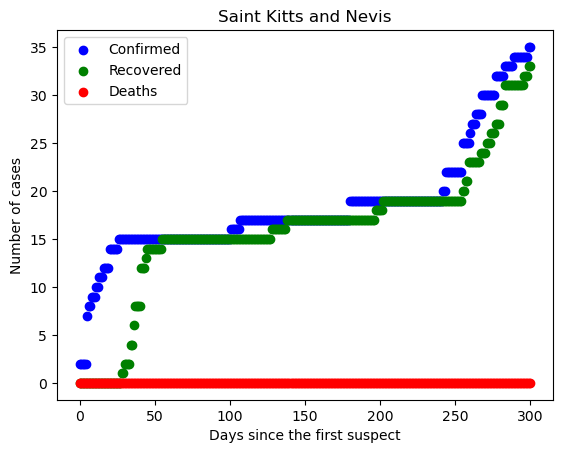

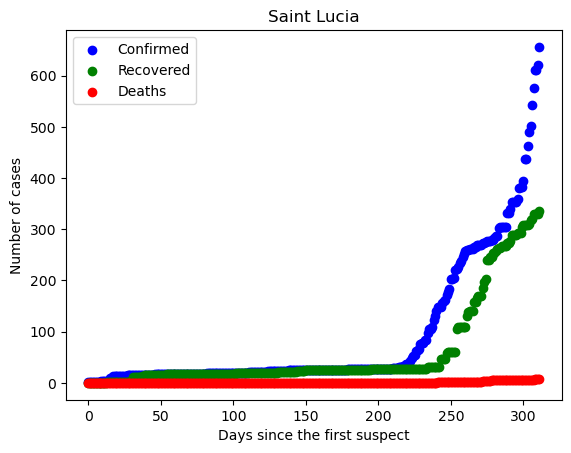

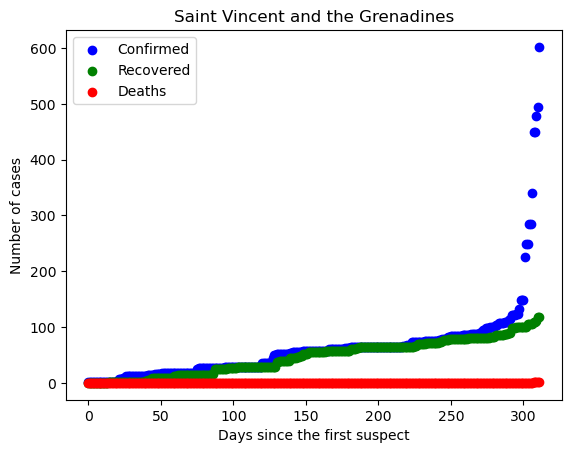

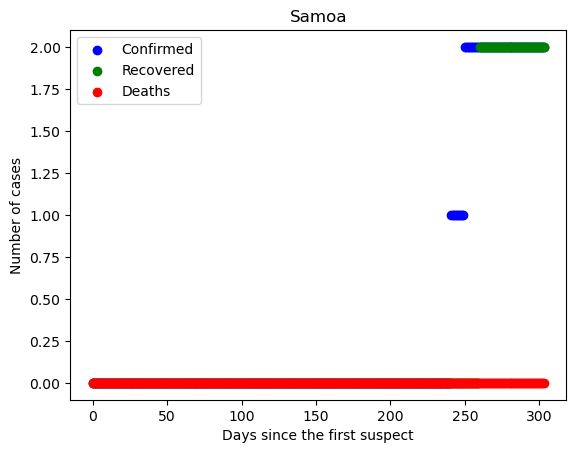

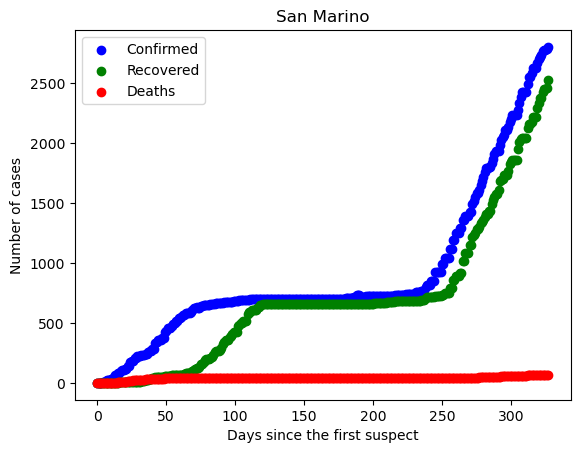

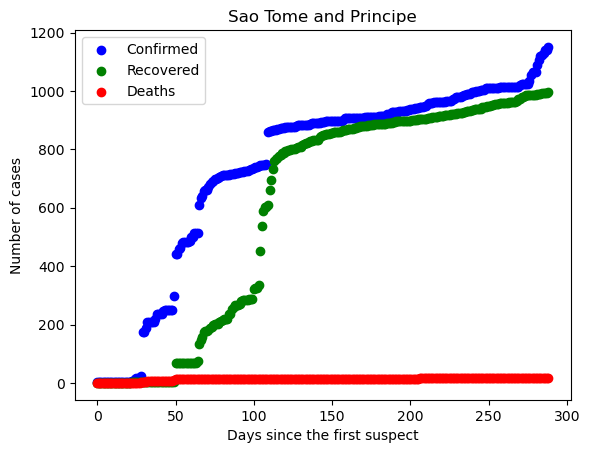

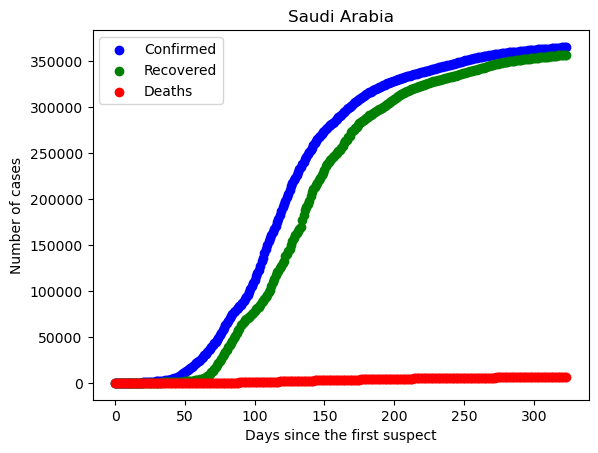

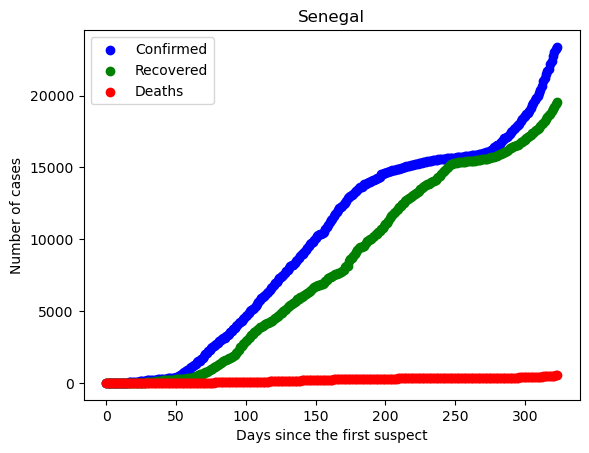

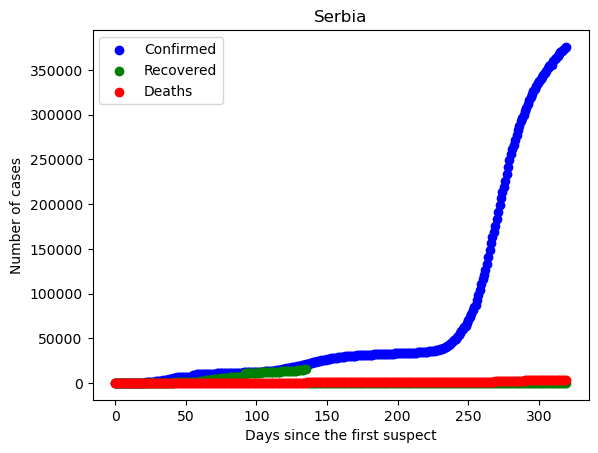

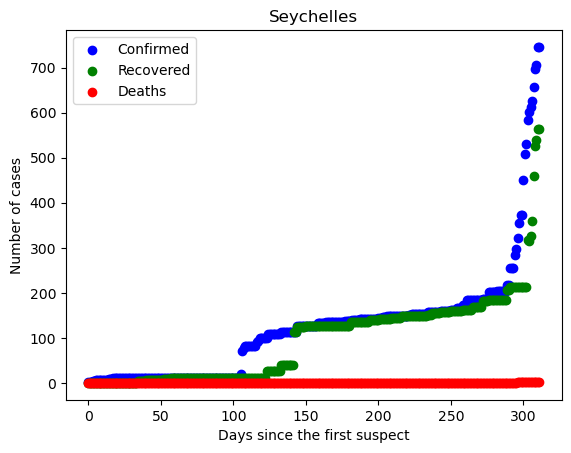

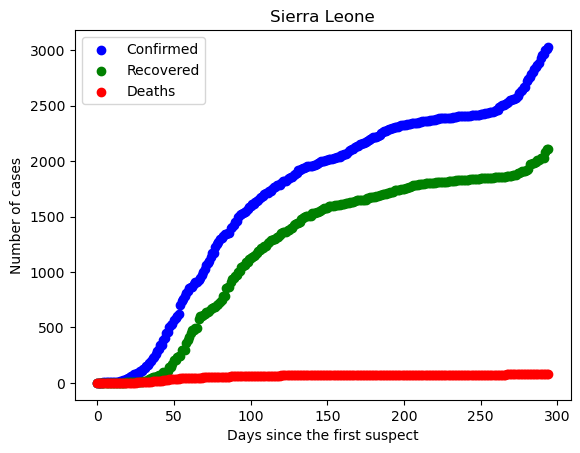

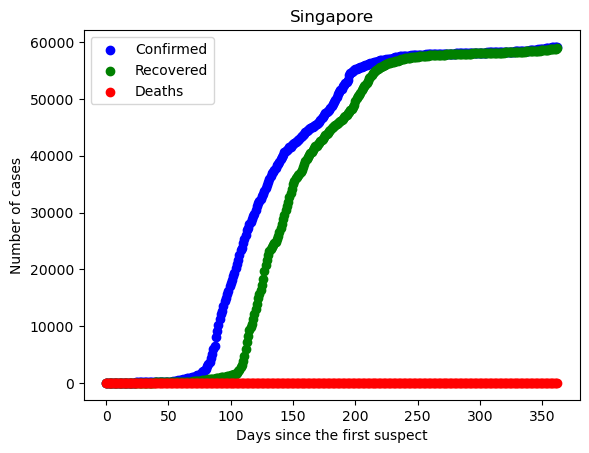

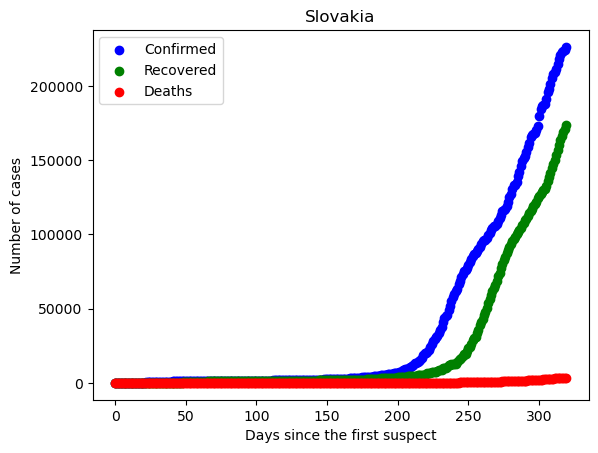

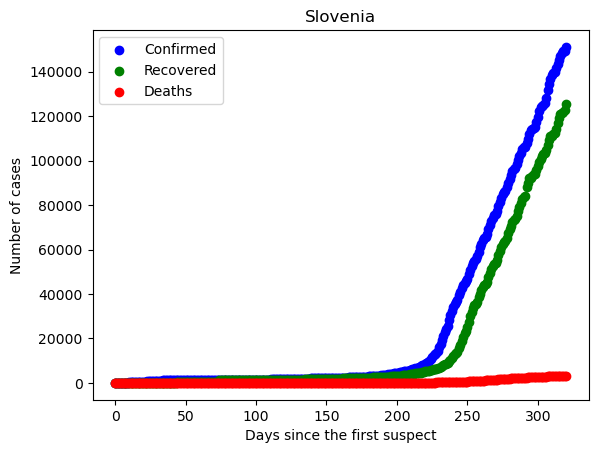

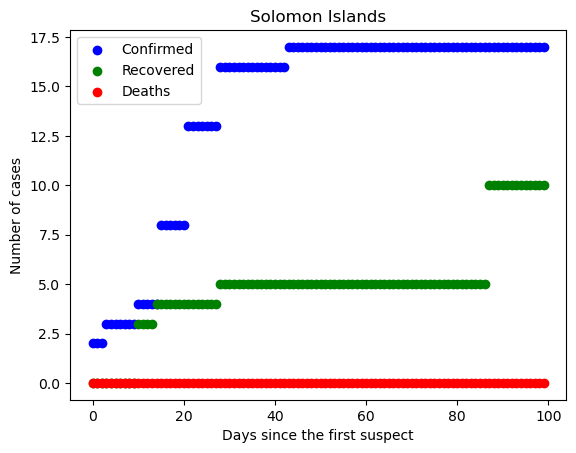

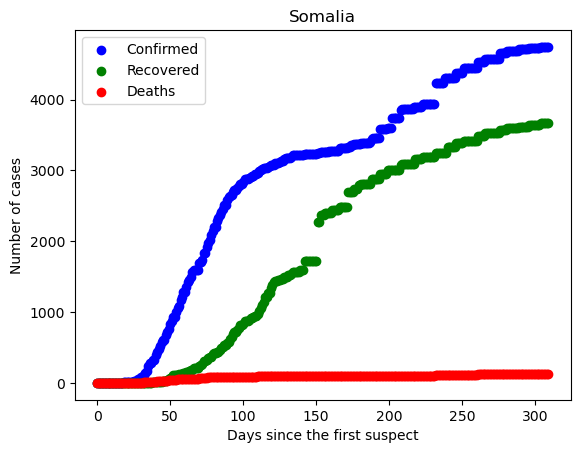

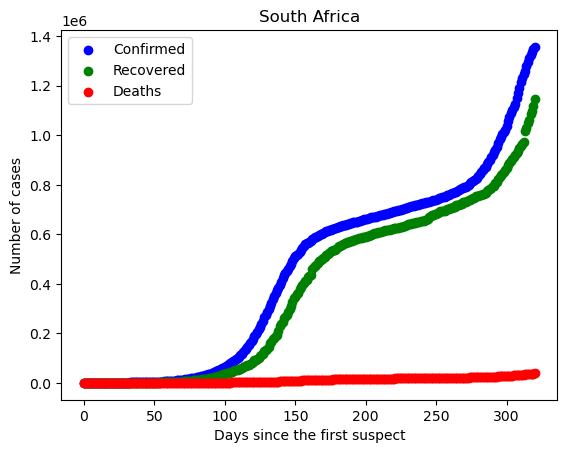

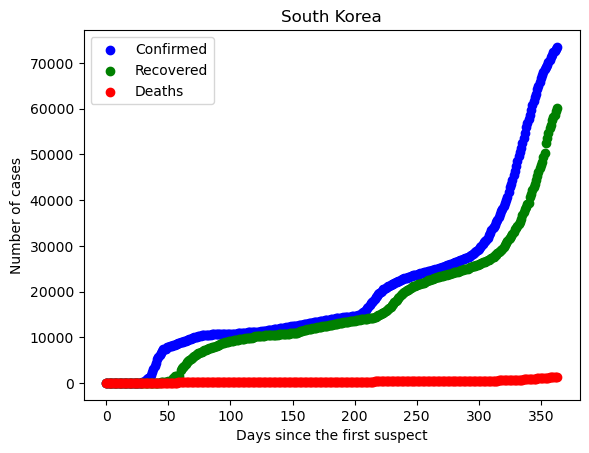

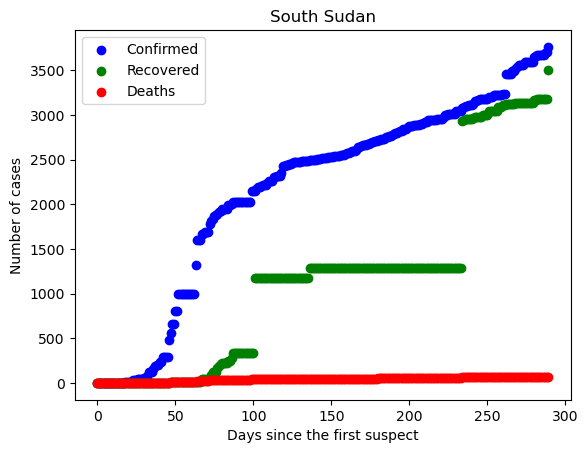

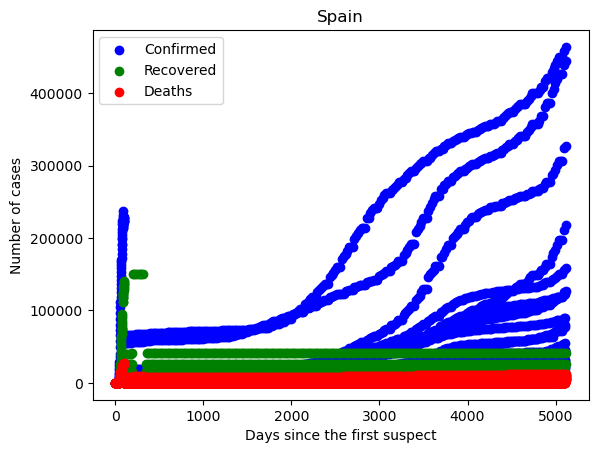

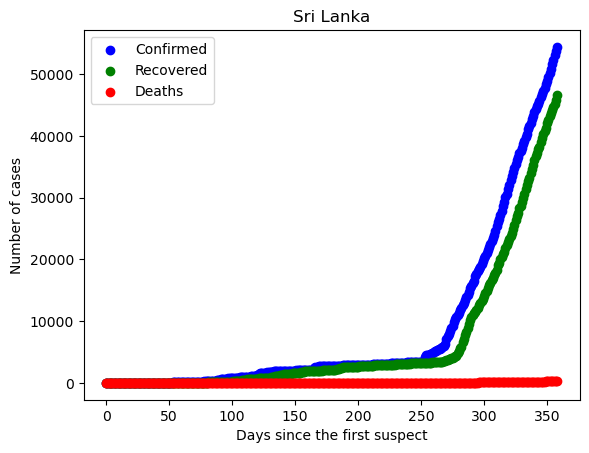

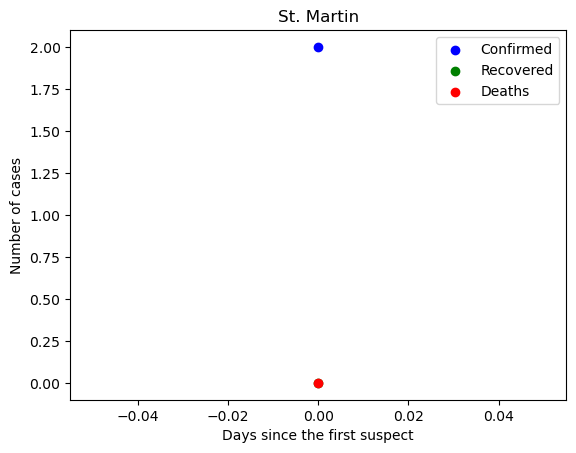

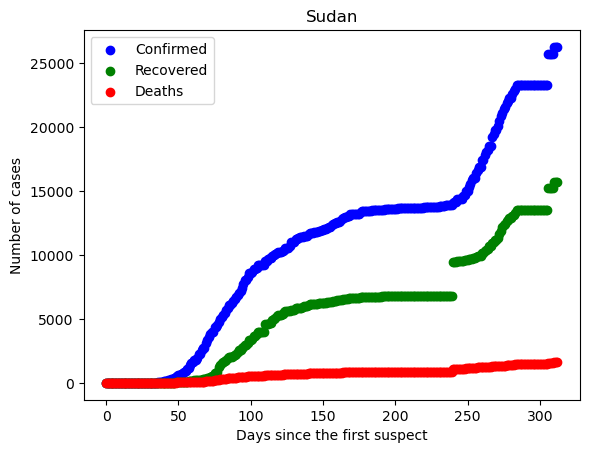

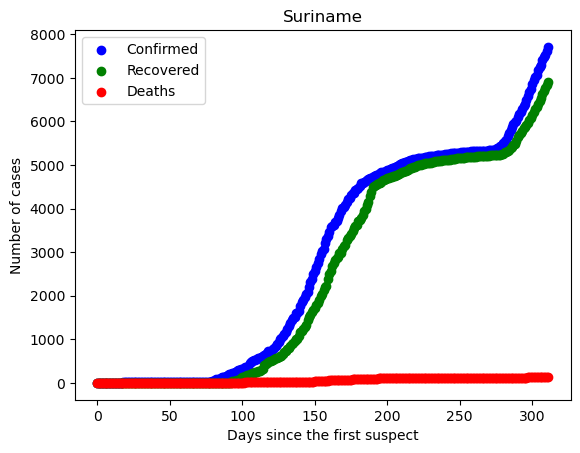

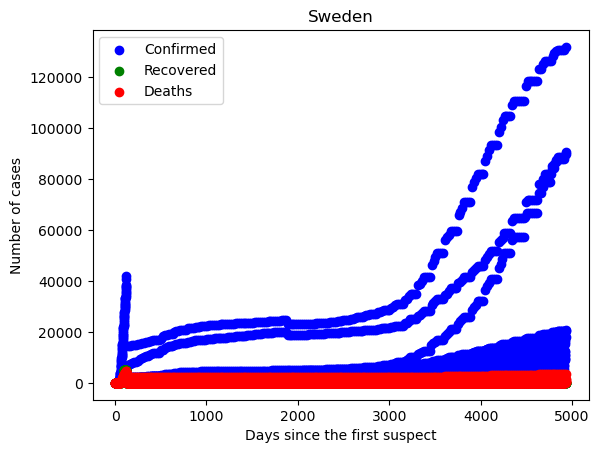

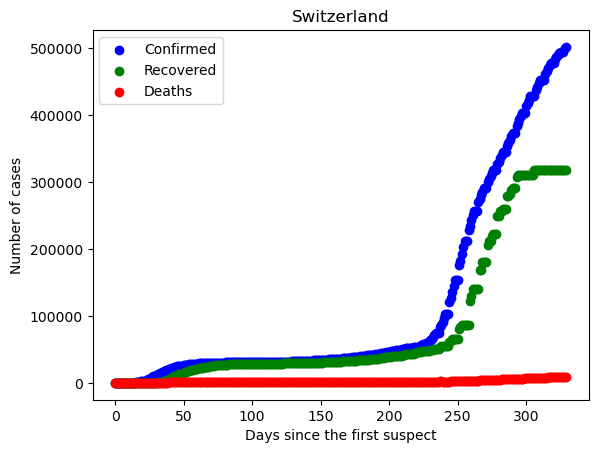

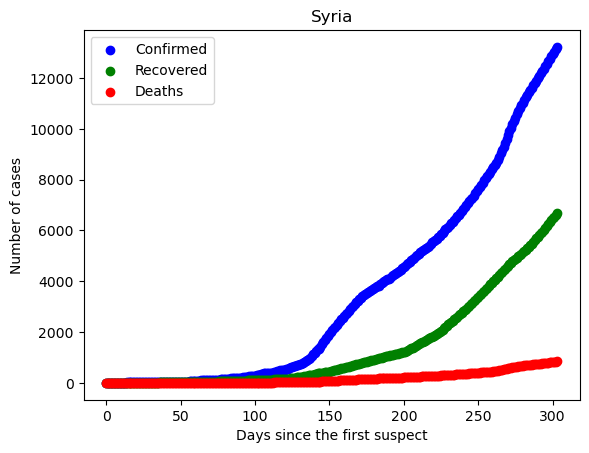

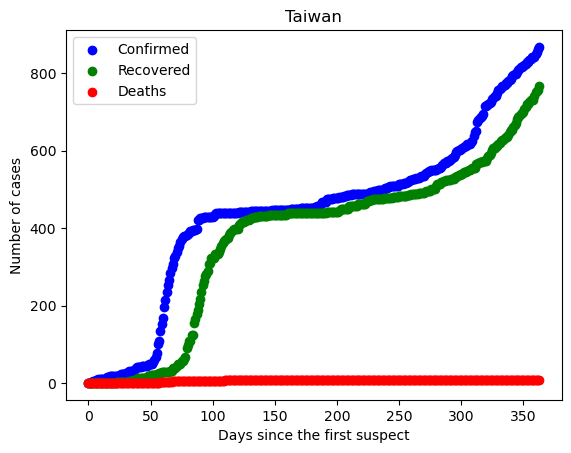

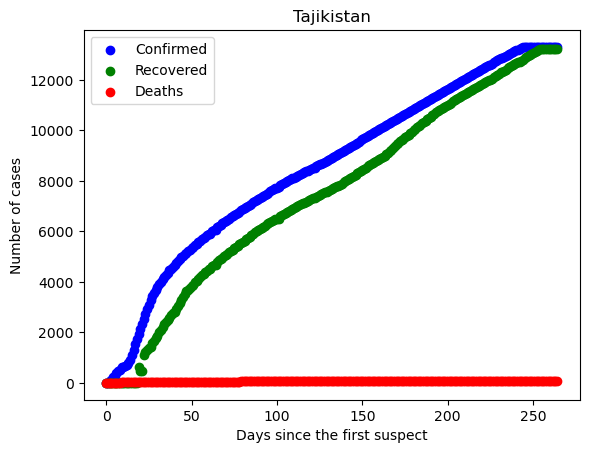

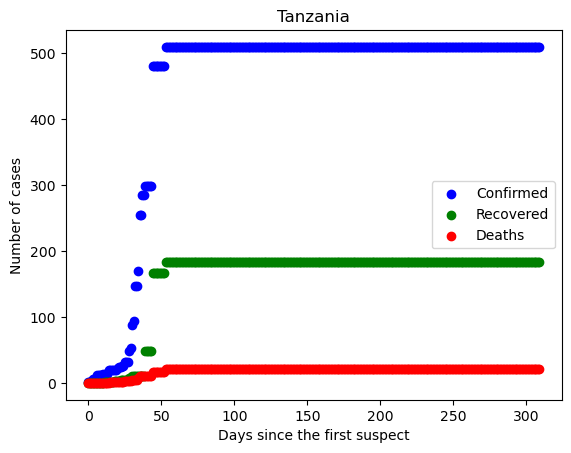

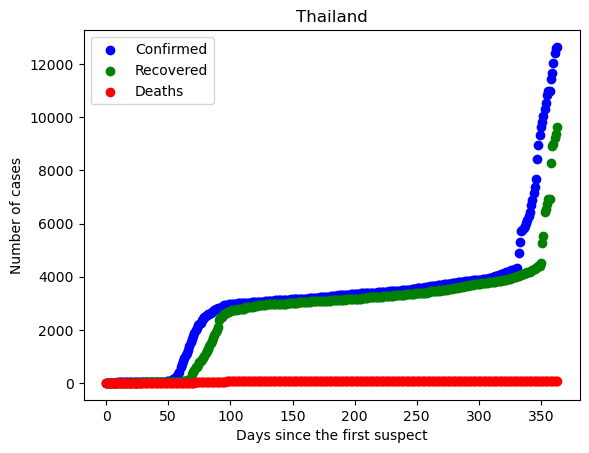

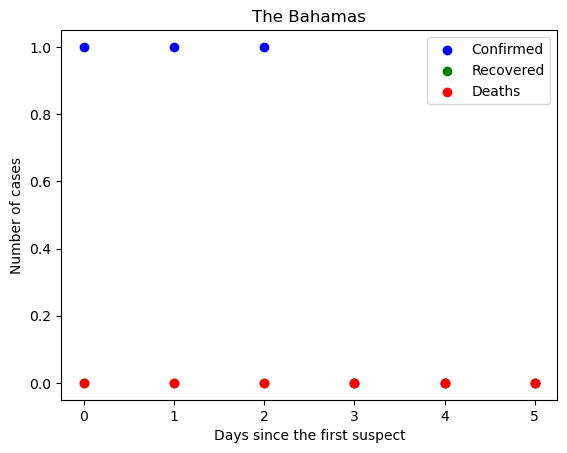

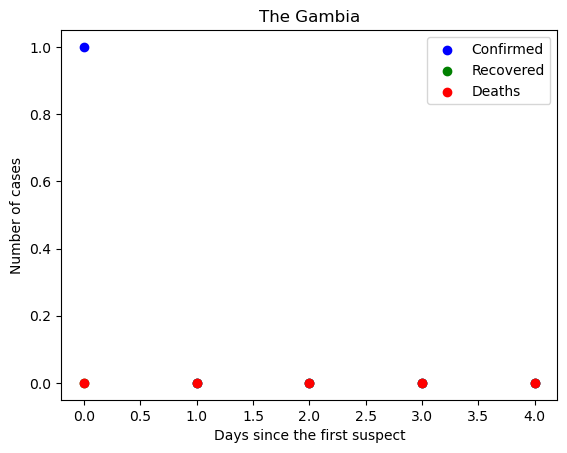

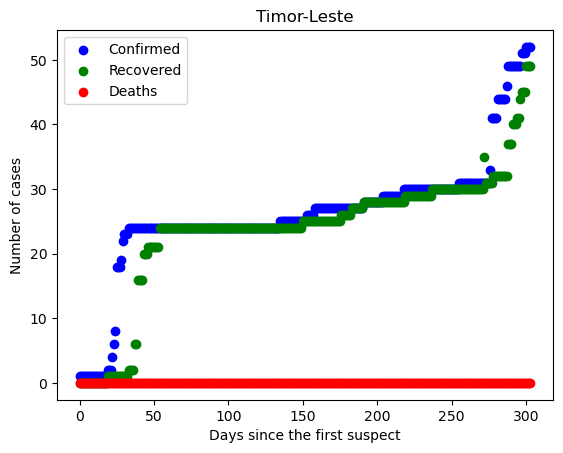

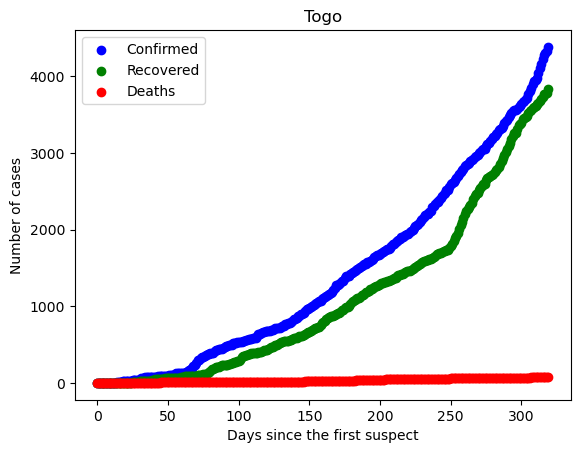

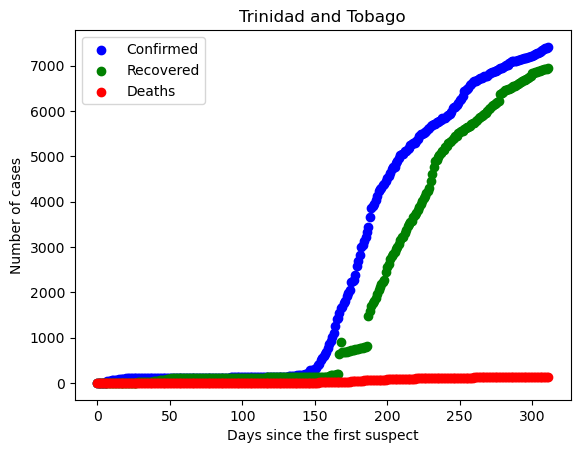

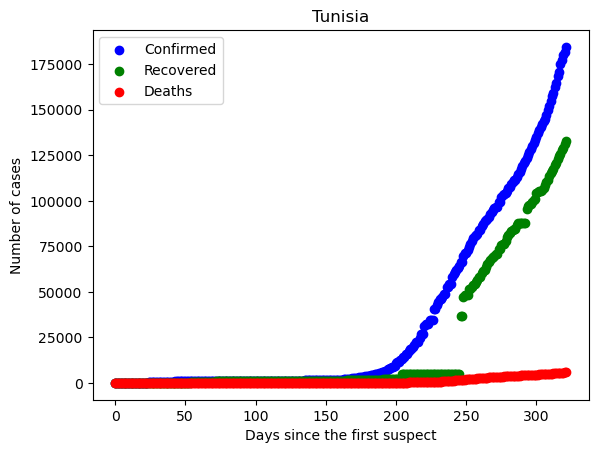

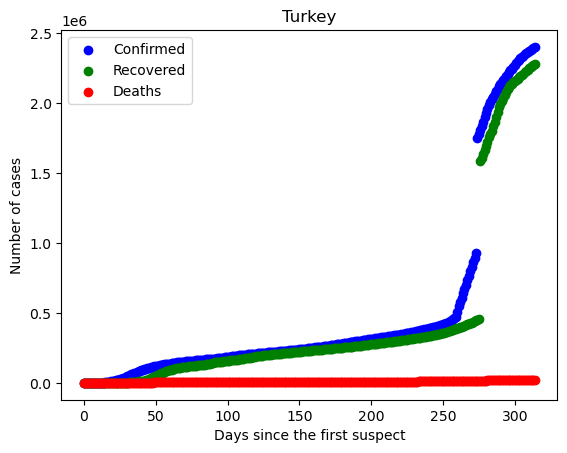

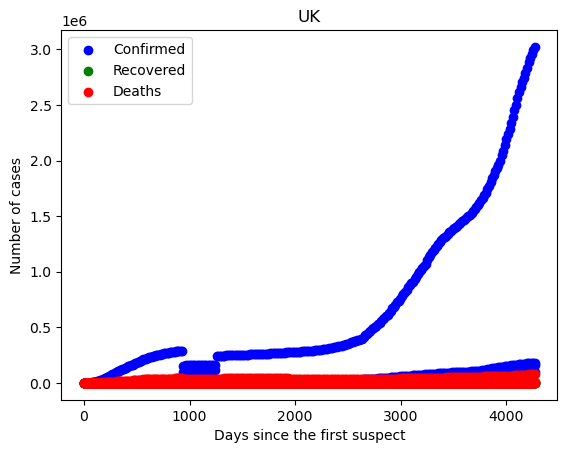

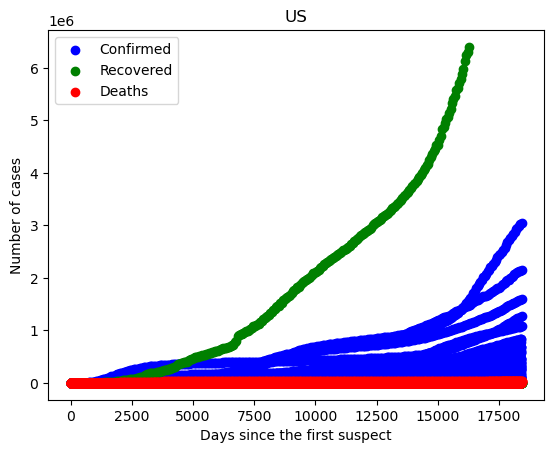

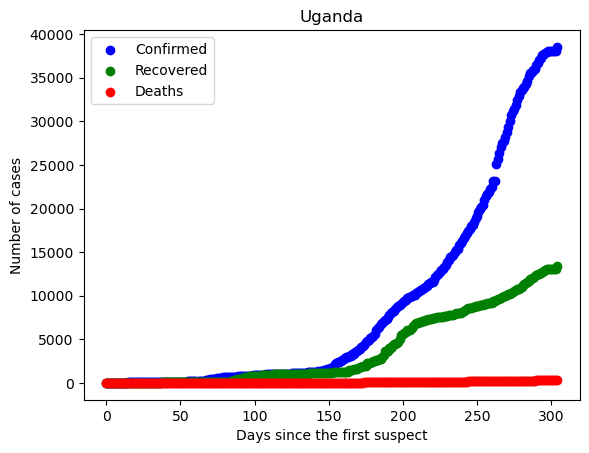

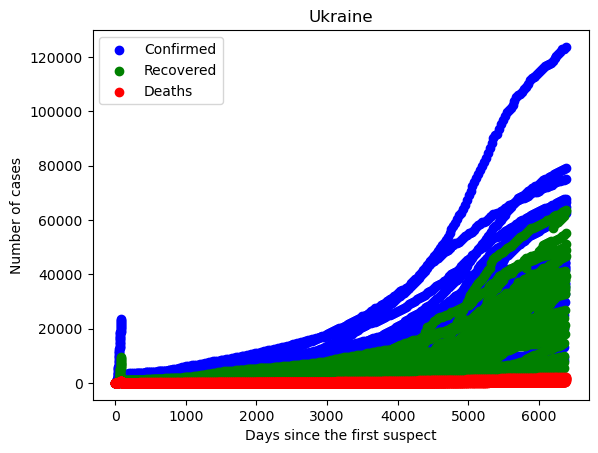

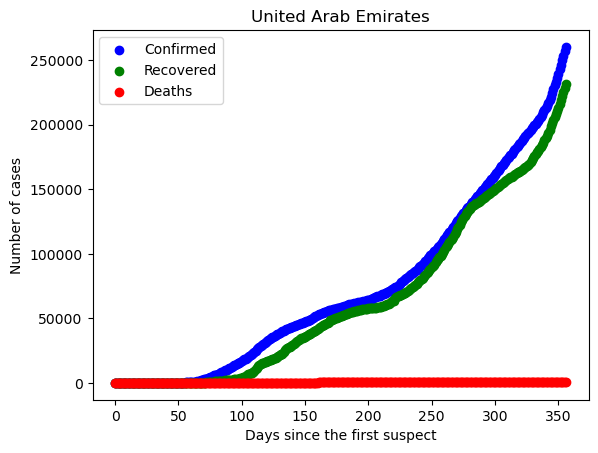

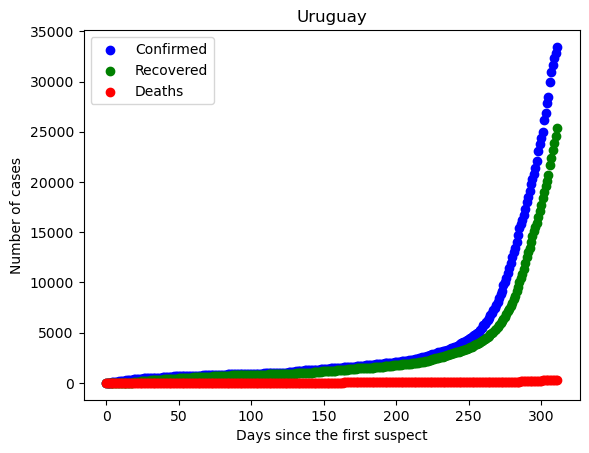

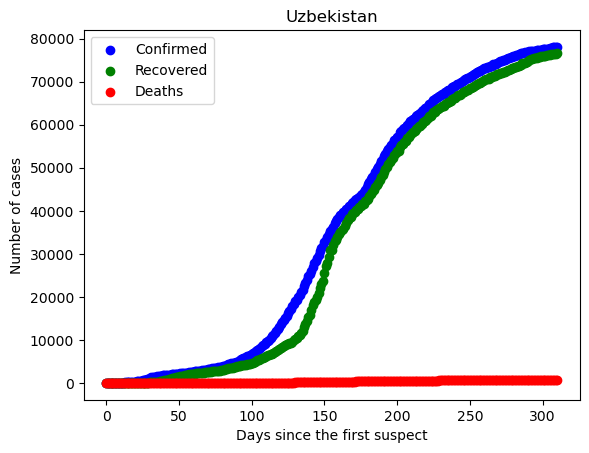

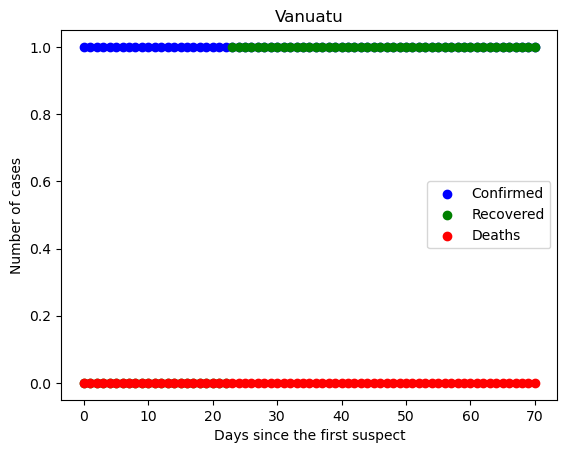

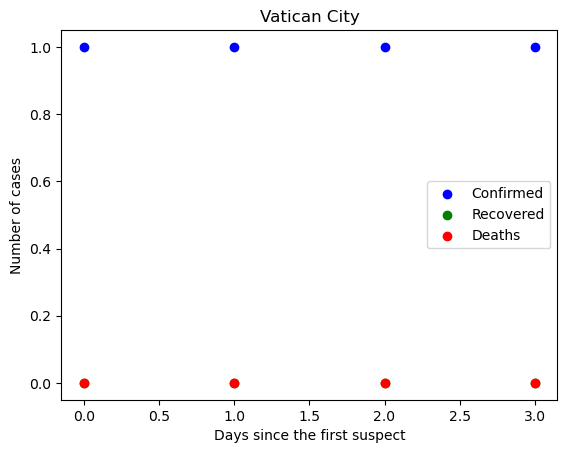

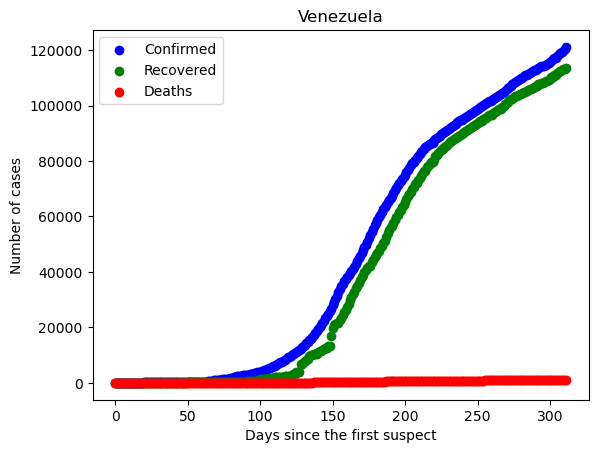

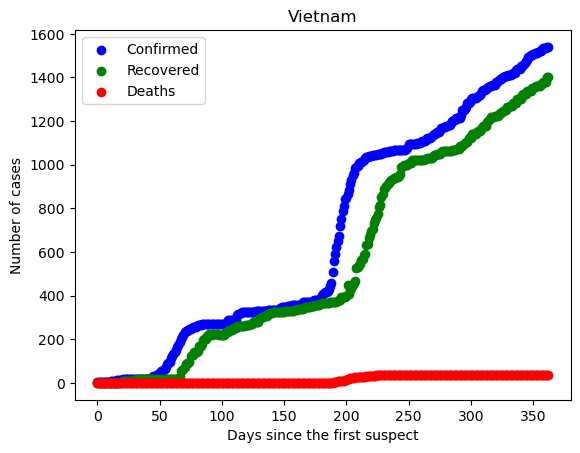

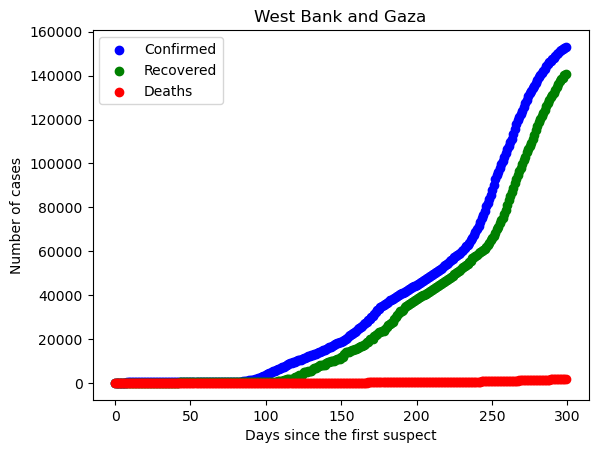

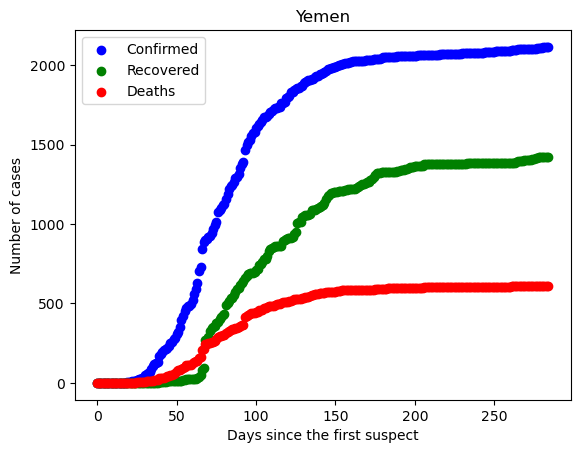

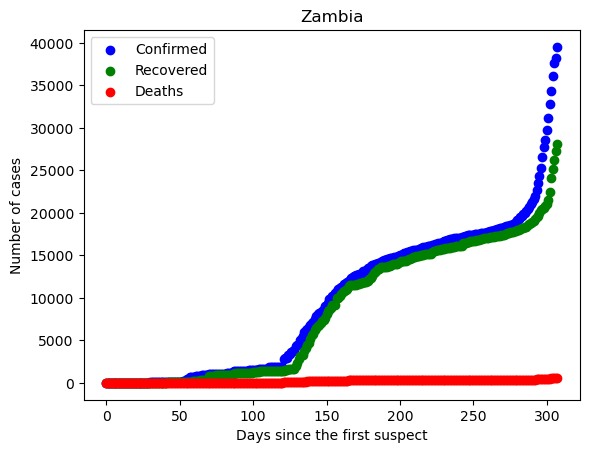

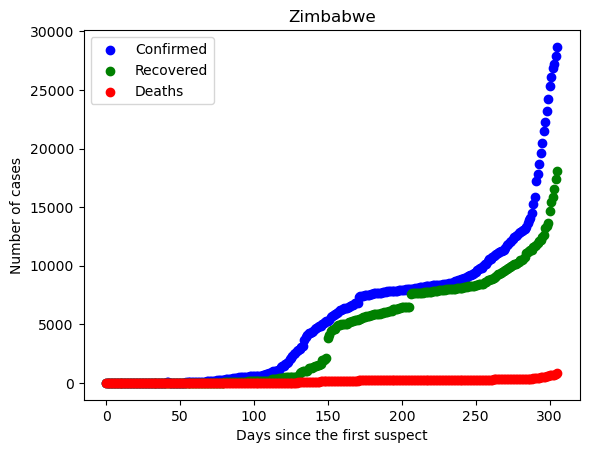

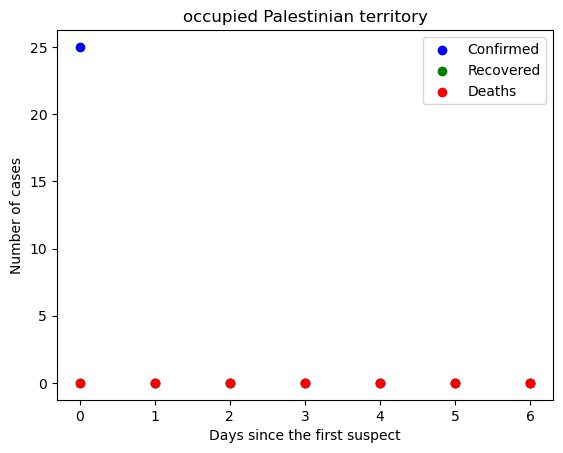

In [115]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()   

In [120]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum(numeric_only=True).reset_index()

In [123]:
print(df4.head(50))
len(df4)

         Date  Confirmed  Deaths  Recovered
0  2020-01-22      531.0    17.0       30.0
1  2020-01-23      601.0    17.0       32.0
2  2020-01-24      880.0    26.0       39.0
3  2020-01-25     1407.0    42.0       42.0
4  2020-01-26     2043.0    56.0       56.0
5  2020-01-27     2912.0    82.0       65.0
6  2020-01-28     5542.0   130.0      108.0
7  2020-01-29     6162.0   133.0      127.0
8  2020-01-30     8233.0   171.0      145.0
9  2020-01-31     9922.0   213.0      225.0
10 2020-02-01    12033.0   259.0      287.0
11 2020-02-02    16780.0   362.0      476.0
12 2020-02-03    19840.0   426.0      626.0
13 2020-02-04    23883.0   492.0      857.0
14 2020-02-05    27625.0   564.0     1129.0
15 2020-02-06    30803.0   634.0     1492.0
16 2020-02-07    34383.0   719.0     2016.0
17 2020-02-08    37112.0   806.0     2616.0
18 2020-02-09    40145.0   906.0     3245.0
19 2020-02-10    42757.0  1013.0     3947.0
20 2020-02-11    44796.0  1113.0     4684.0
21 2020-02-12    45215.0  1118.0

364

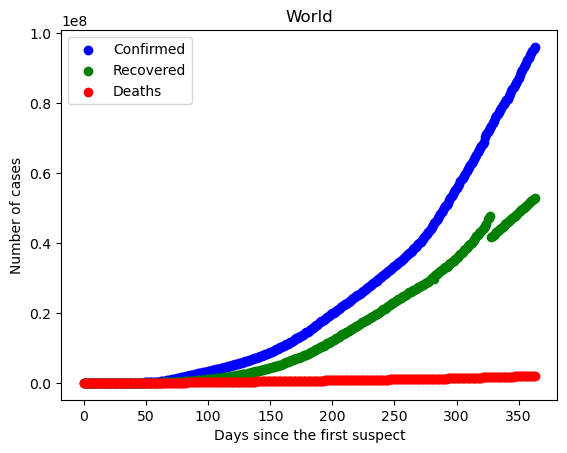

In [122]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()